In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_theme(style='darkgrid',palette="turbo_r")
%matplotlib inline

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [3]:
df.describe().round(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
count     3999.00     3999.00    3999.00    3999.00    3999.00      3999.00   
mean     73601.33      144.11       2.06       1.01       1.01     17144.85   
std     100775.66      773.66       1.38       0.15       0.20     24150.97   
min          0.00        0.00       1.00       1.00       1.00         0.00   
25%      18527.50        0.00       1.00       1.00       1.00      1250.00   
50%      43097.00        0.00       1.00       1.00       1.00      7171.00   
75%      92404.00        0.00       3.00       1.00       1.00     23800.50   
max    1704838.00    11148.00       5.00       3.00       5.00    263685.00   

       Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
count       3999.0            3999.00          3999.00            3999.00   
mean          11.6             460.06             1.37            4118.56   
std            9.6            1400.21             3.79            2065.13   
min            0.0               0.00             0.00               2.00   
25%            3.0               0.00             0.00            2330.00   
50%           12.0               0.00             0.00            4096.00   
75%           17.0             311.00             1.00            5790.50   
max           86.0           30817.00            53.00            8296.00   

        Award?  
count  3999.00  
mean      0.37  
std       0.48  
min       0.00  
25%       0.00  
50%       0.00  
75%       1.00  
max       1.00

In [4]:
df.isnull().sum()#no null values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

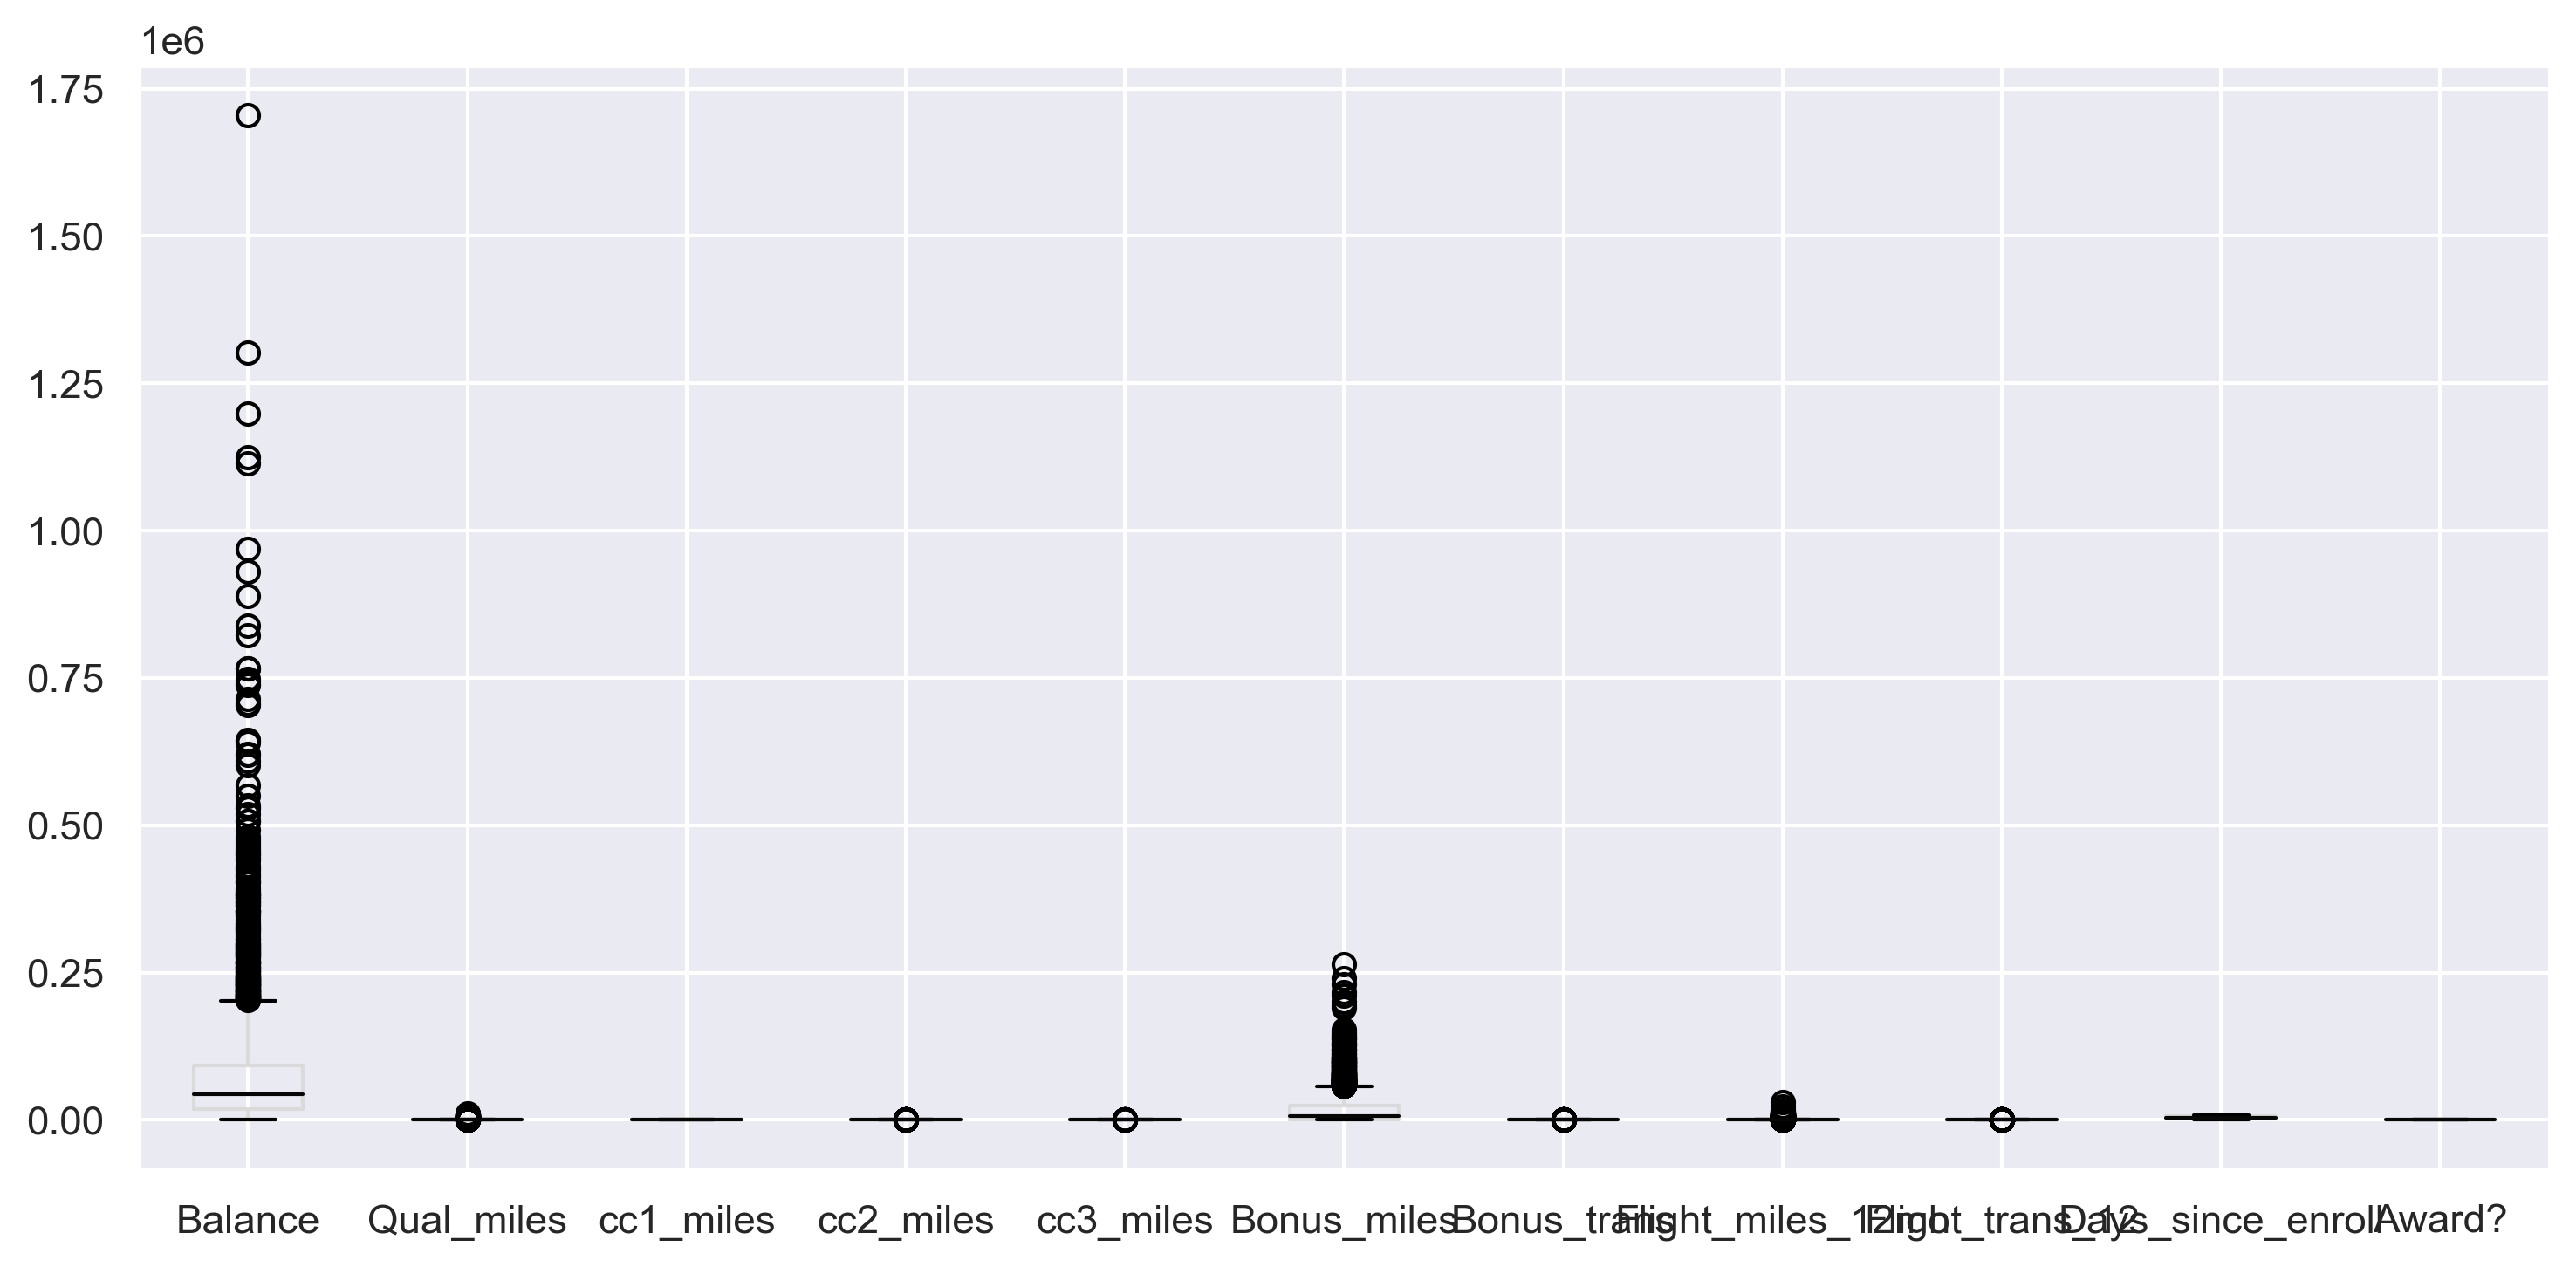

In [5]:
df.boxplot()#lots of noise(outliers)
plt.tight_layout()

In [6]:
sns.pairplot(df)
plt.tight_layout()

<Axes: >

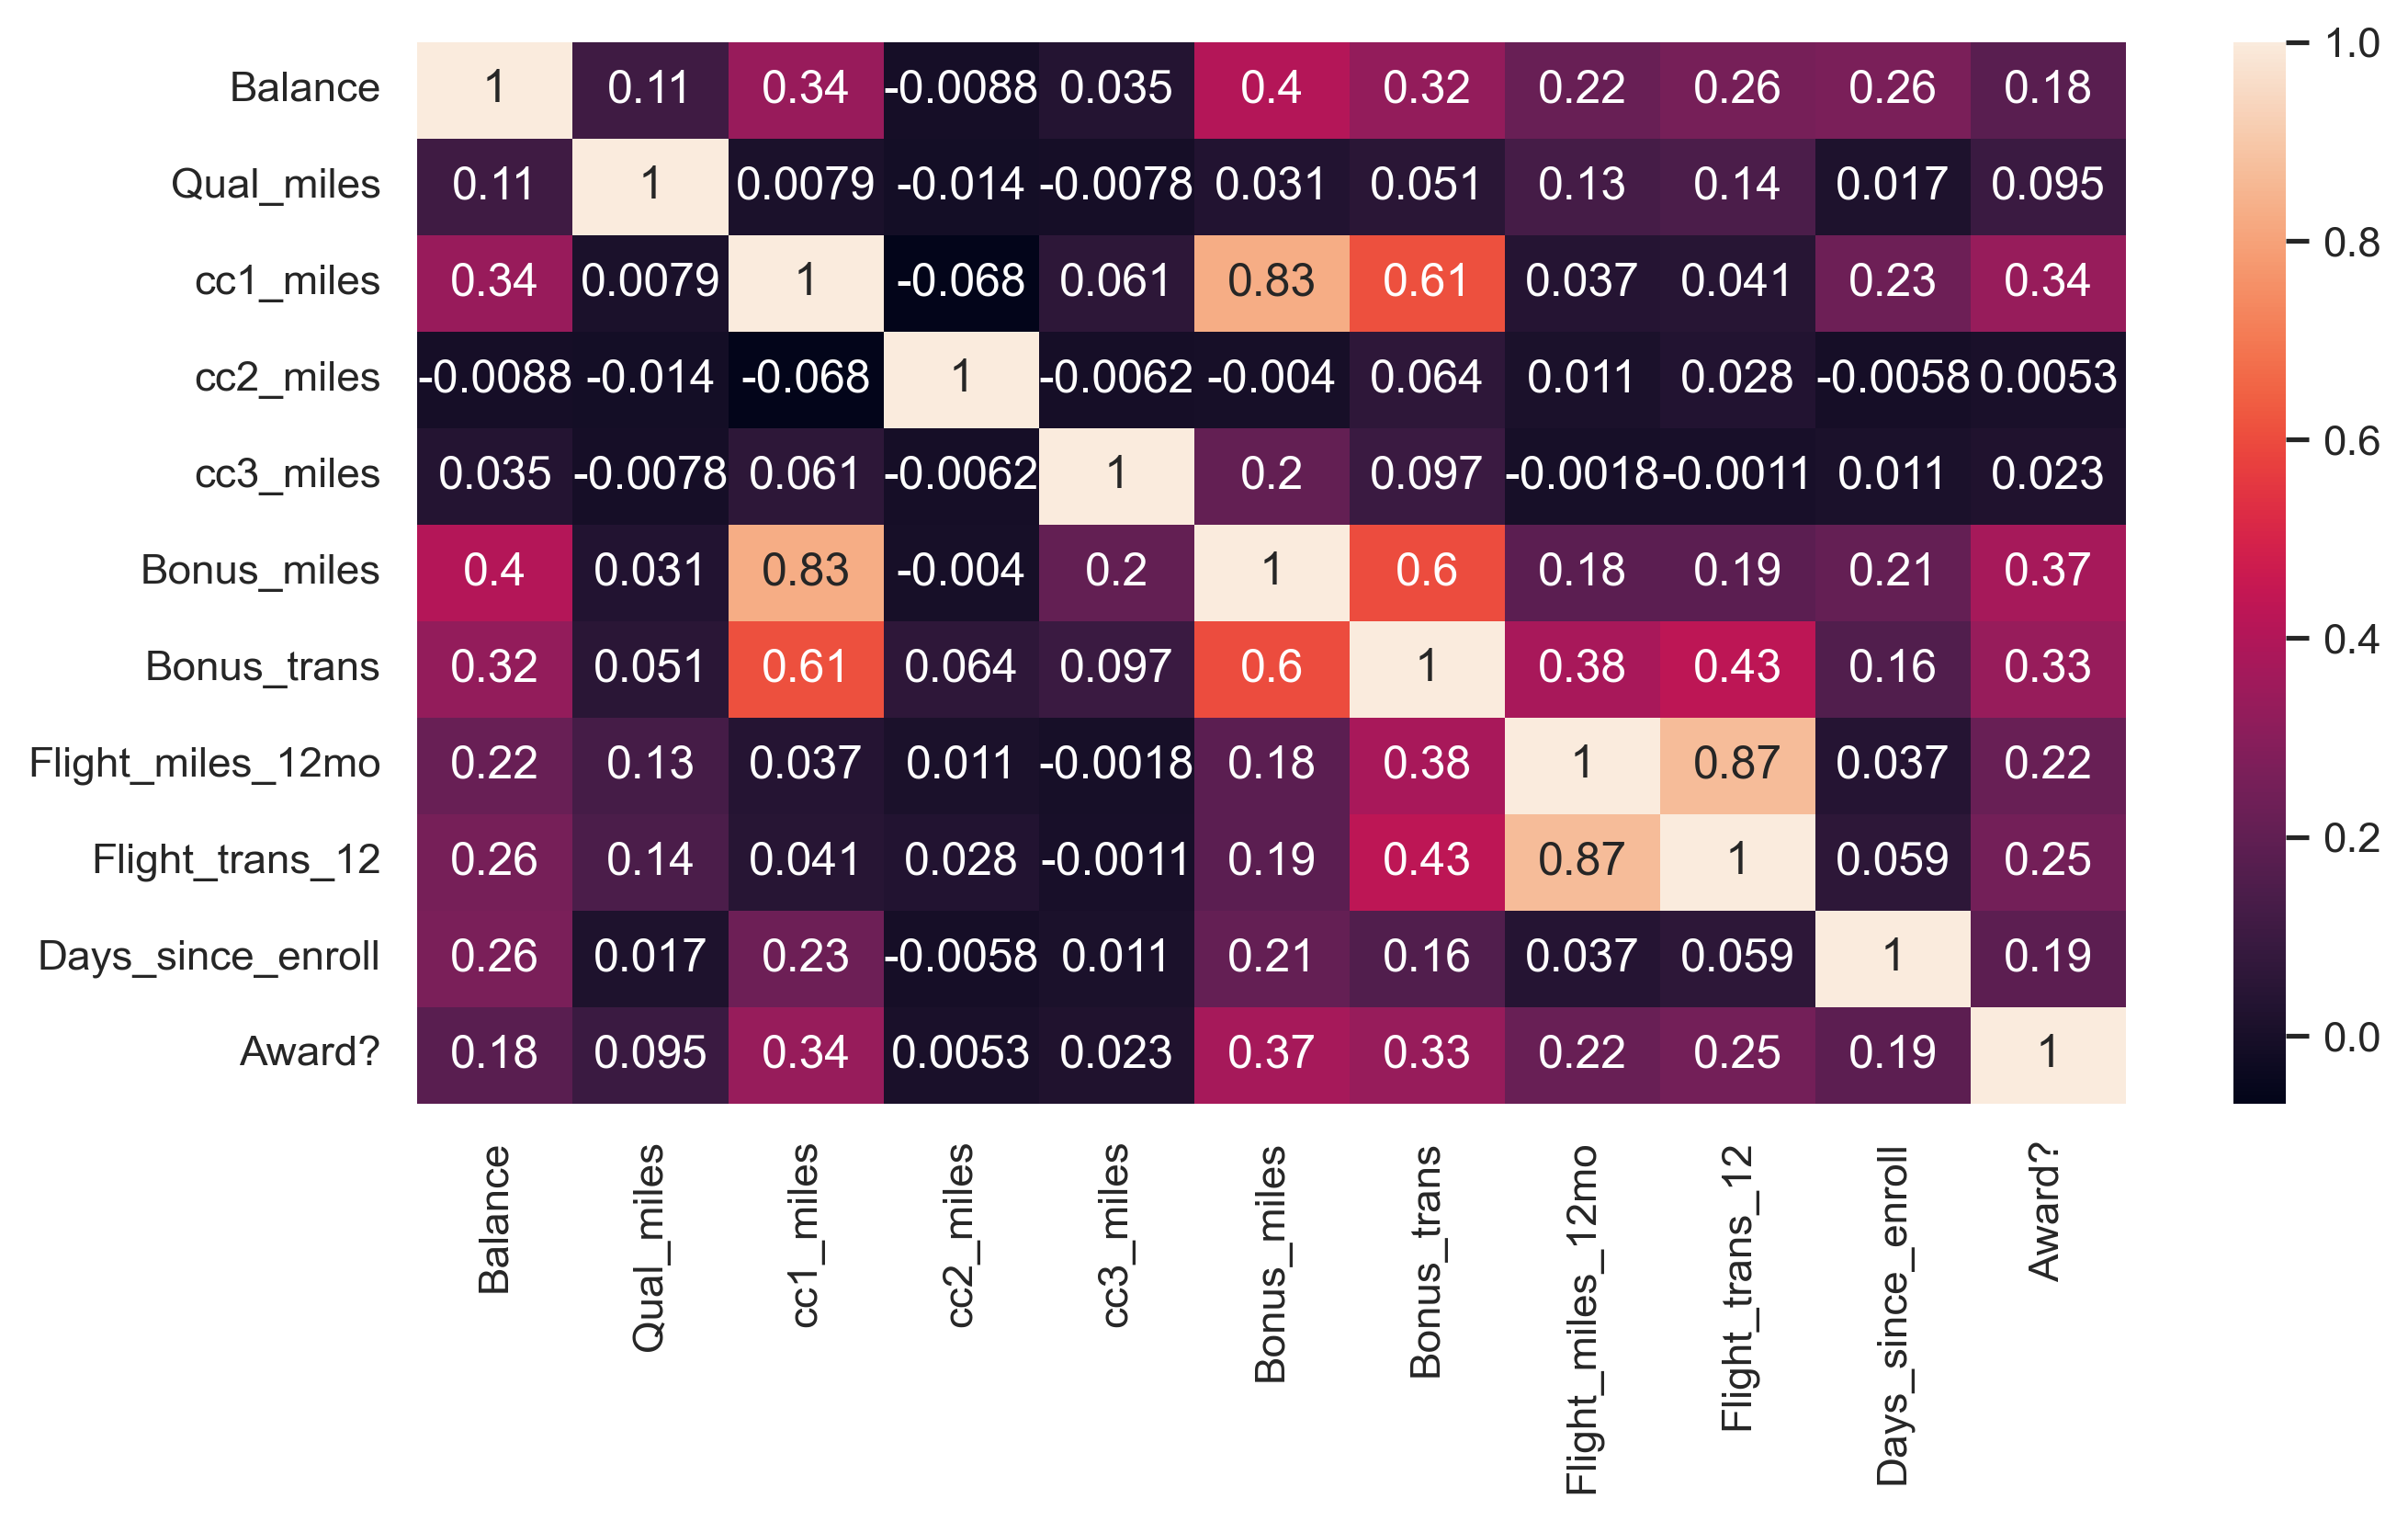

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x=sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# hierarchical

In [9]:
from scipy.cluster import hierarchy

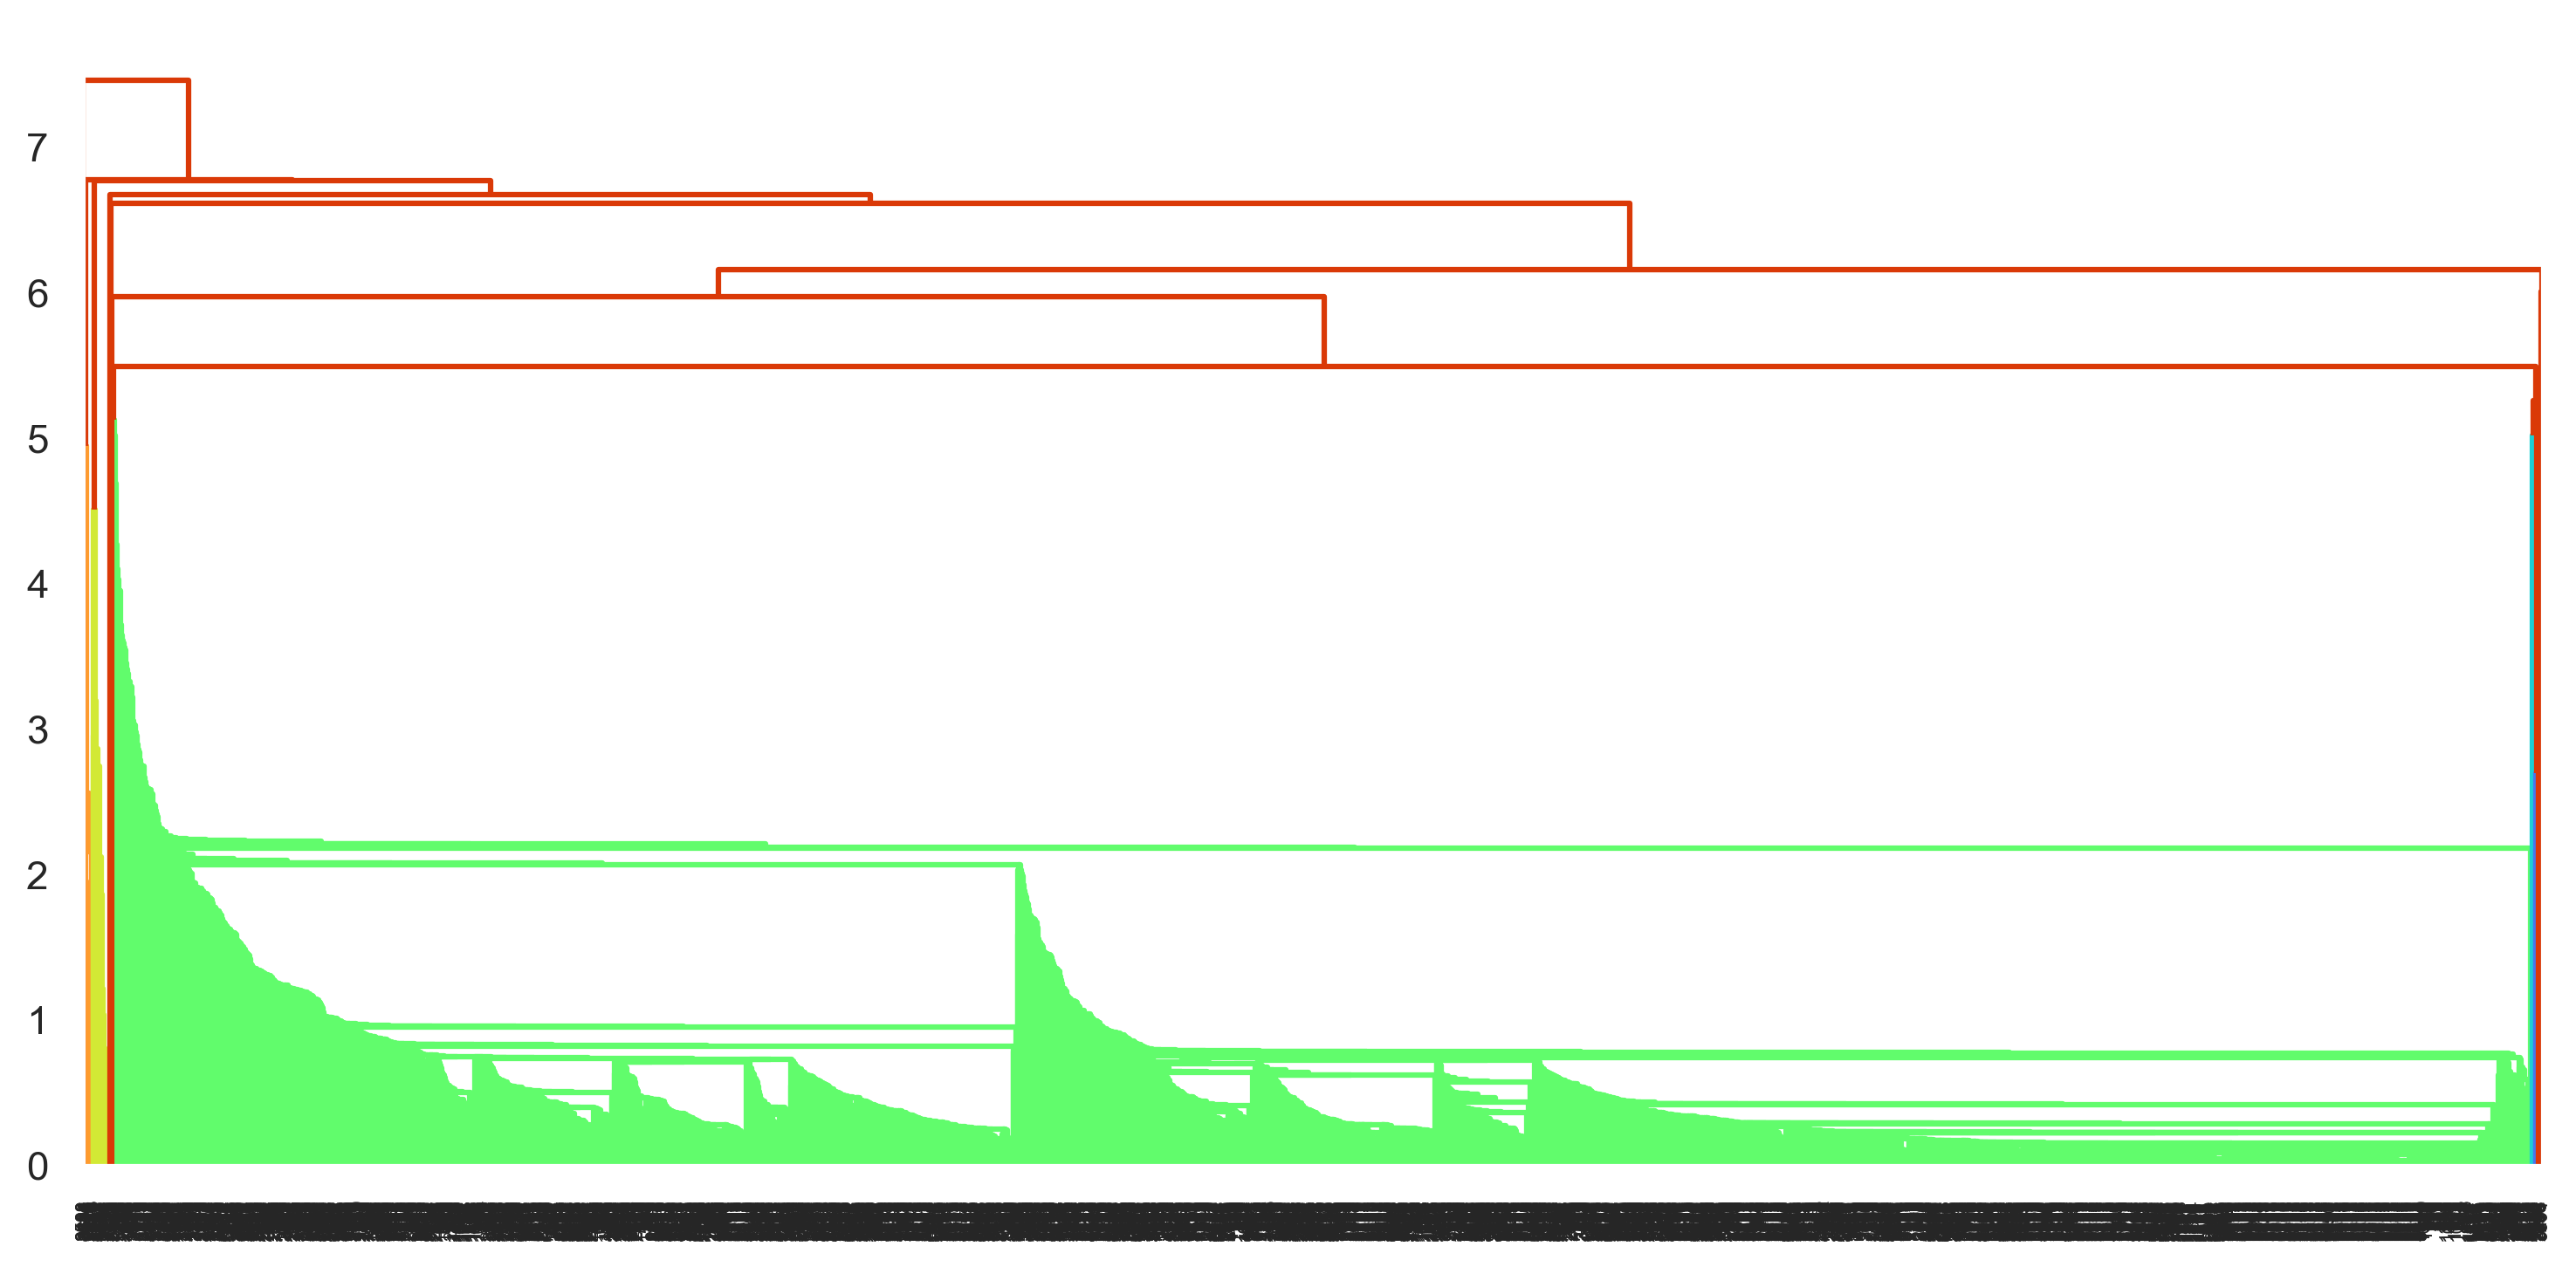

In [10]:
#single linkage
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)
plt.tight_layout()

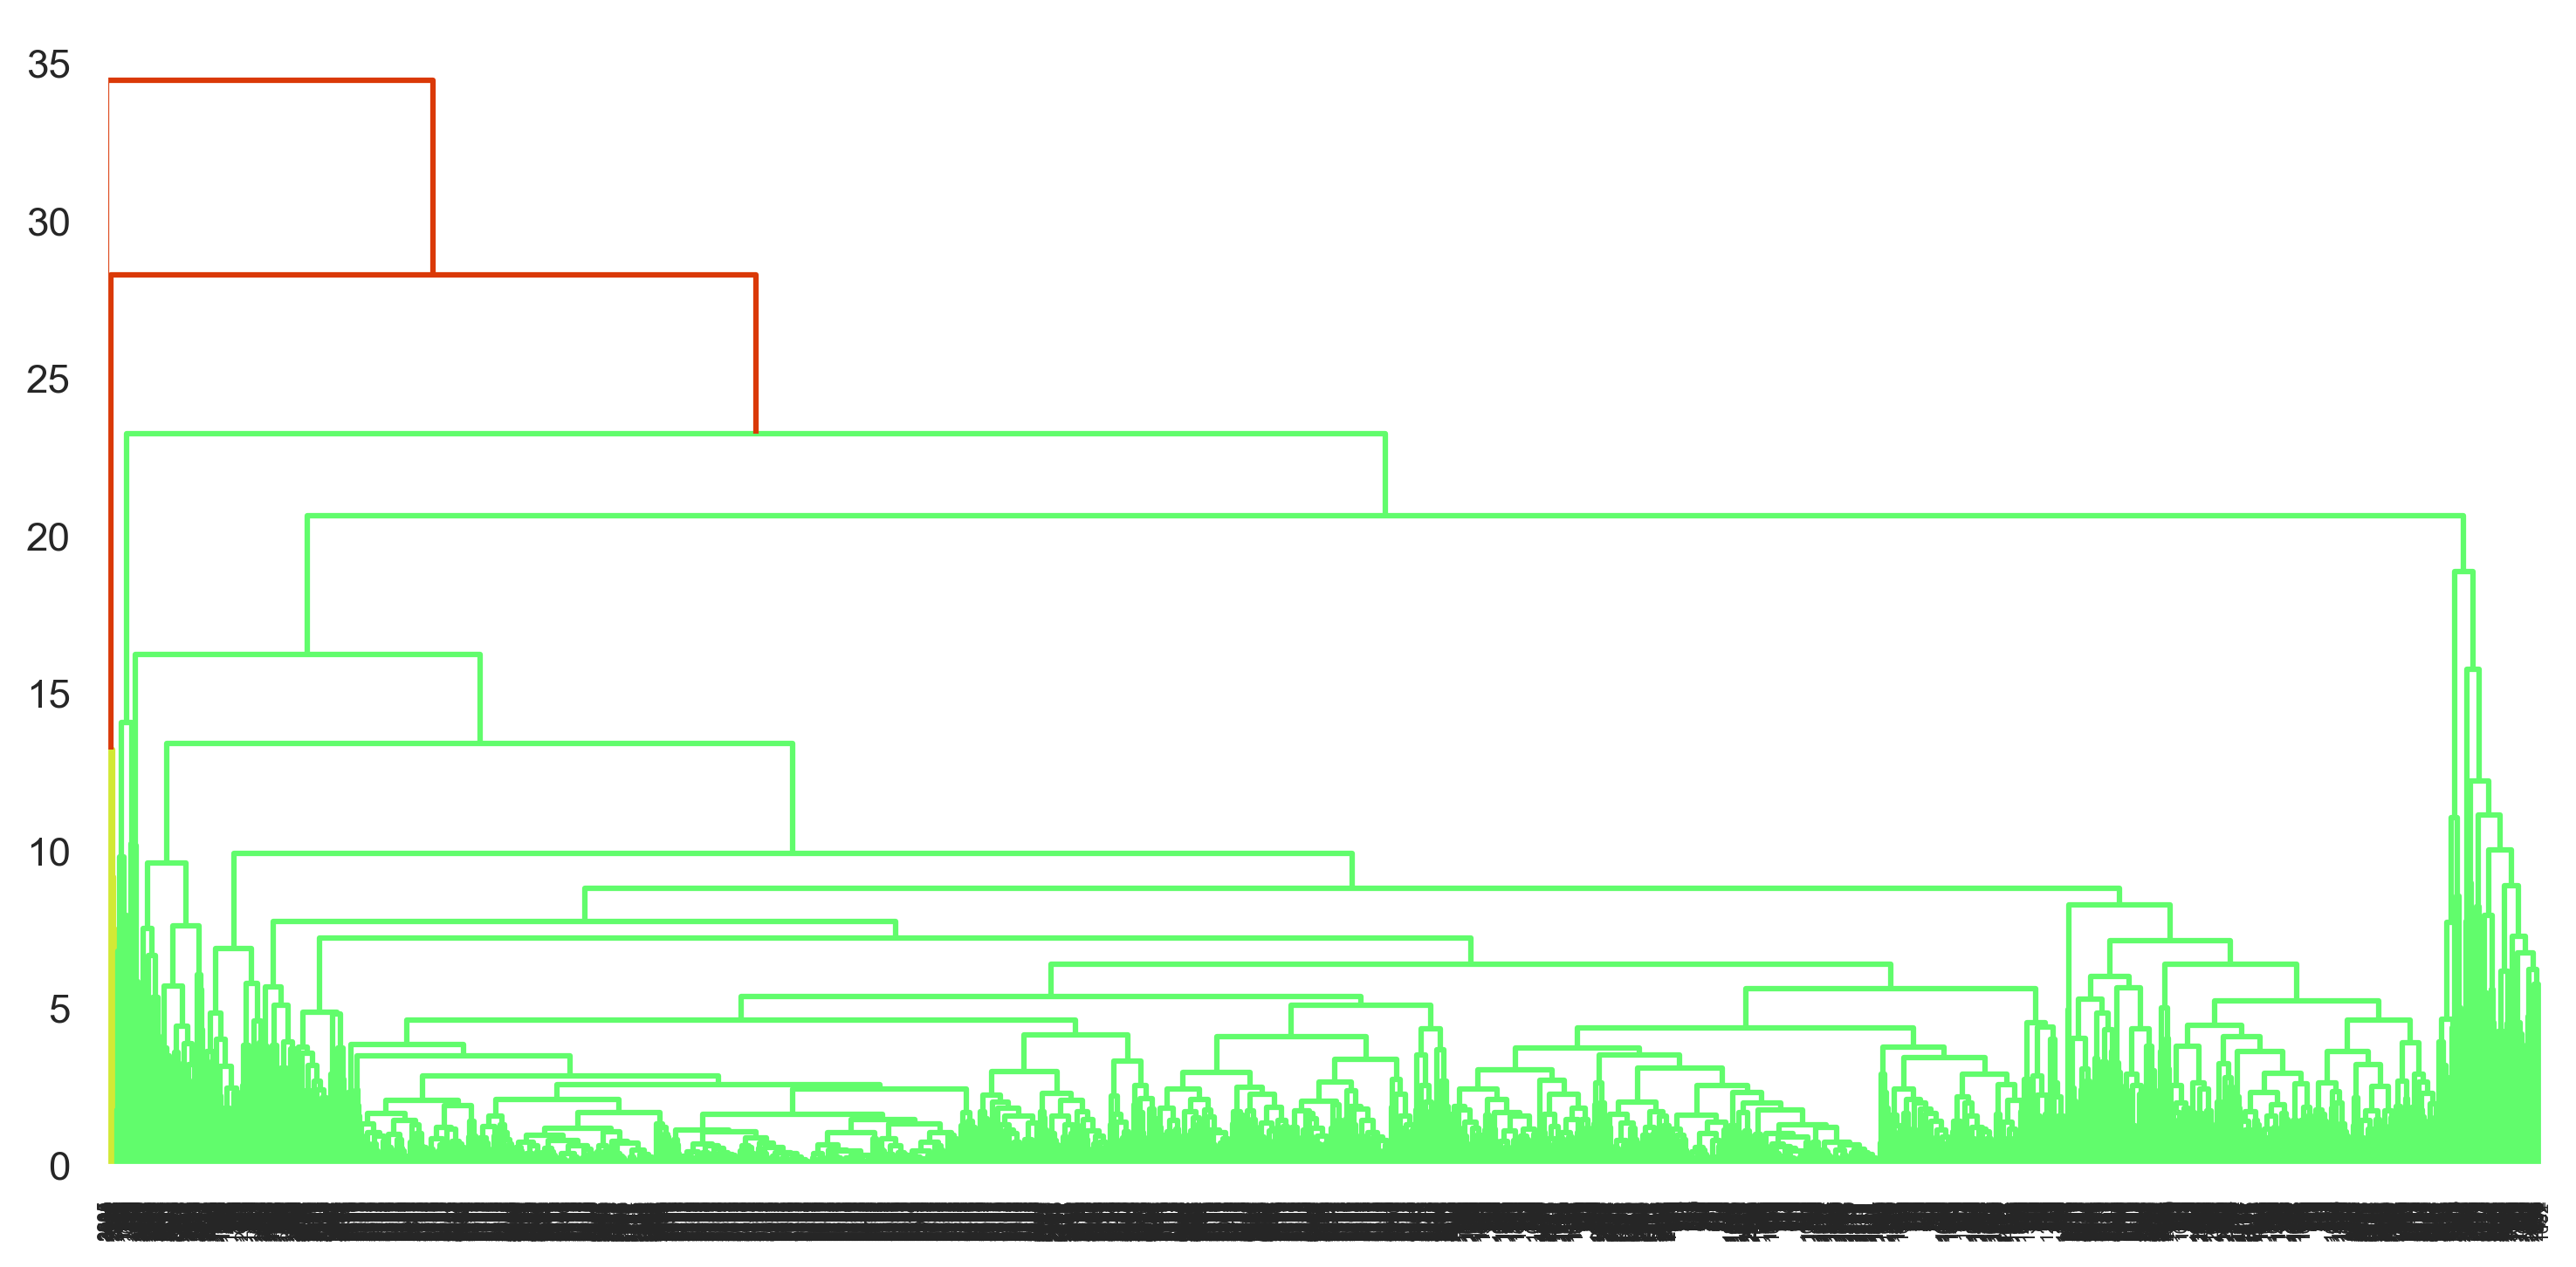

In [11]:
#Complete linkage
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.tight_layout()

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as sil


n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "average", "single", "complete"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df)
        silhouette_score1 = sil(df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.6507953123140028
For n_clusters = 2 The average silhouette_score with linkage- average : 0.9228525915799344
For n_clusters = 2 The average silhouette_score with linkage- single : 0.9417492770493827
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.9092528149593218

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6495571355412016
For n_clusters = 3 The average silhouette_score with linkage- average : 0.8502445439825709
For n_clusters = 3 The average silhouette_score with linkage- single : 0.9147996891031956
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.9019137939139762

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.6124373904307738
For n_clusters = 4 The average silhouette_score with linkage- average : 0.8498502276523877
For n_clusters = 4 The average silhouette_score with linkage- single : 0.9110853508184983
For n_c

In [13]:
df1 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)

hc=AgglomerativeClustering(n_clusters=2)
yp_HC=hc.fit_predict(x)
yp_HC
df1['Cluster_HC']=yp_HC

df1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster_HC  
ID#                       
1          0           1  
2          0           1  
3          0           1  
4          0           1  
5          1           0  
...      ...         ...  
4017       1           1  
4018       1           1  
4019       1           0  
4020       0           1  
4021       0           1  

[3999 rows x 12 columns]

In [16]:
df1.groupby('Cluster_HC').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_HC                                                               
0           117912.886093  366.377483   3.406623   1.000000    1.03245   
1            46718.863399    9.274407   1.242266   1.023303    1.00000   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_HC                                                                  
0           37101.439735    19.037086         853.826490         2.483444   
1            5037.792688     7.091201         221.167135         0.700281   

            Days_since_enroll    Award?  
Cluster_HC                               
0                 4688.513245  0.670861  
1                 3772.785858  0.188027

# K-means clustering

In [17]:
from sklearn.cluster import KMeans 
km=KMeans()

In [18]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

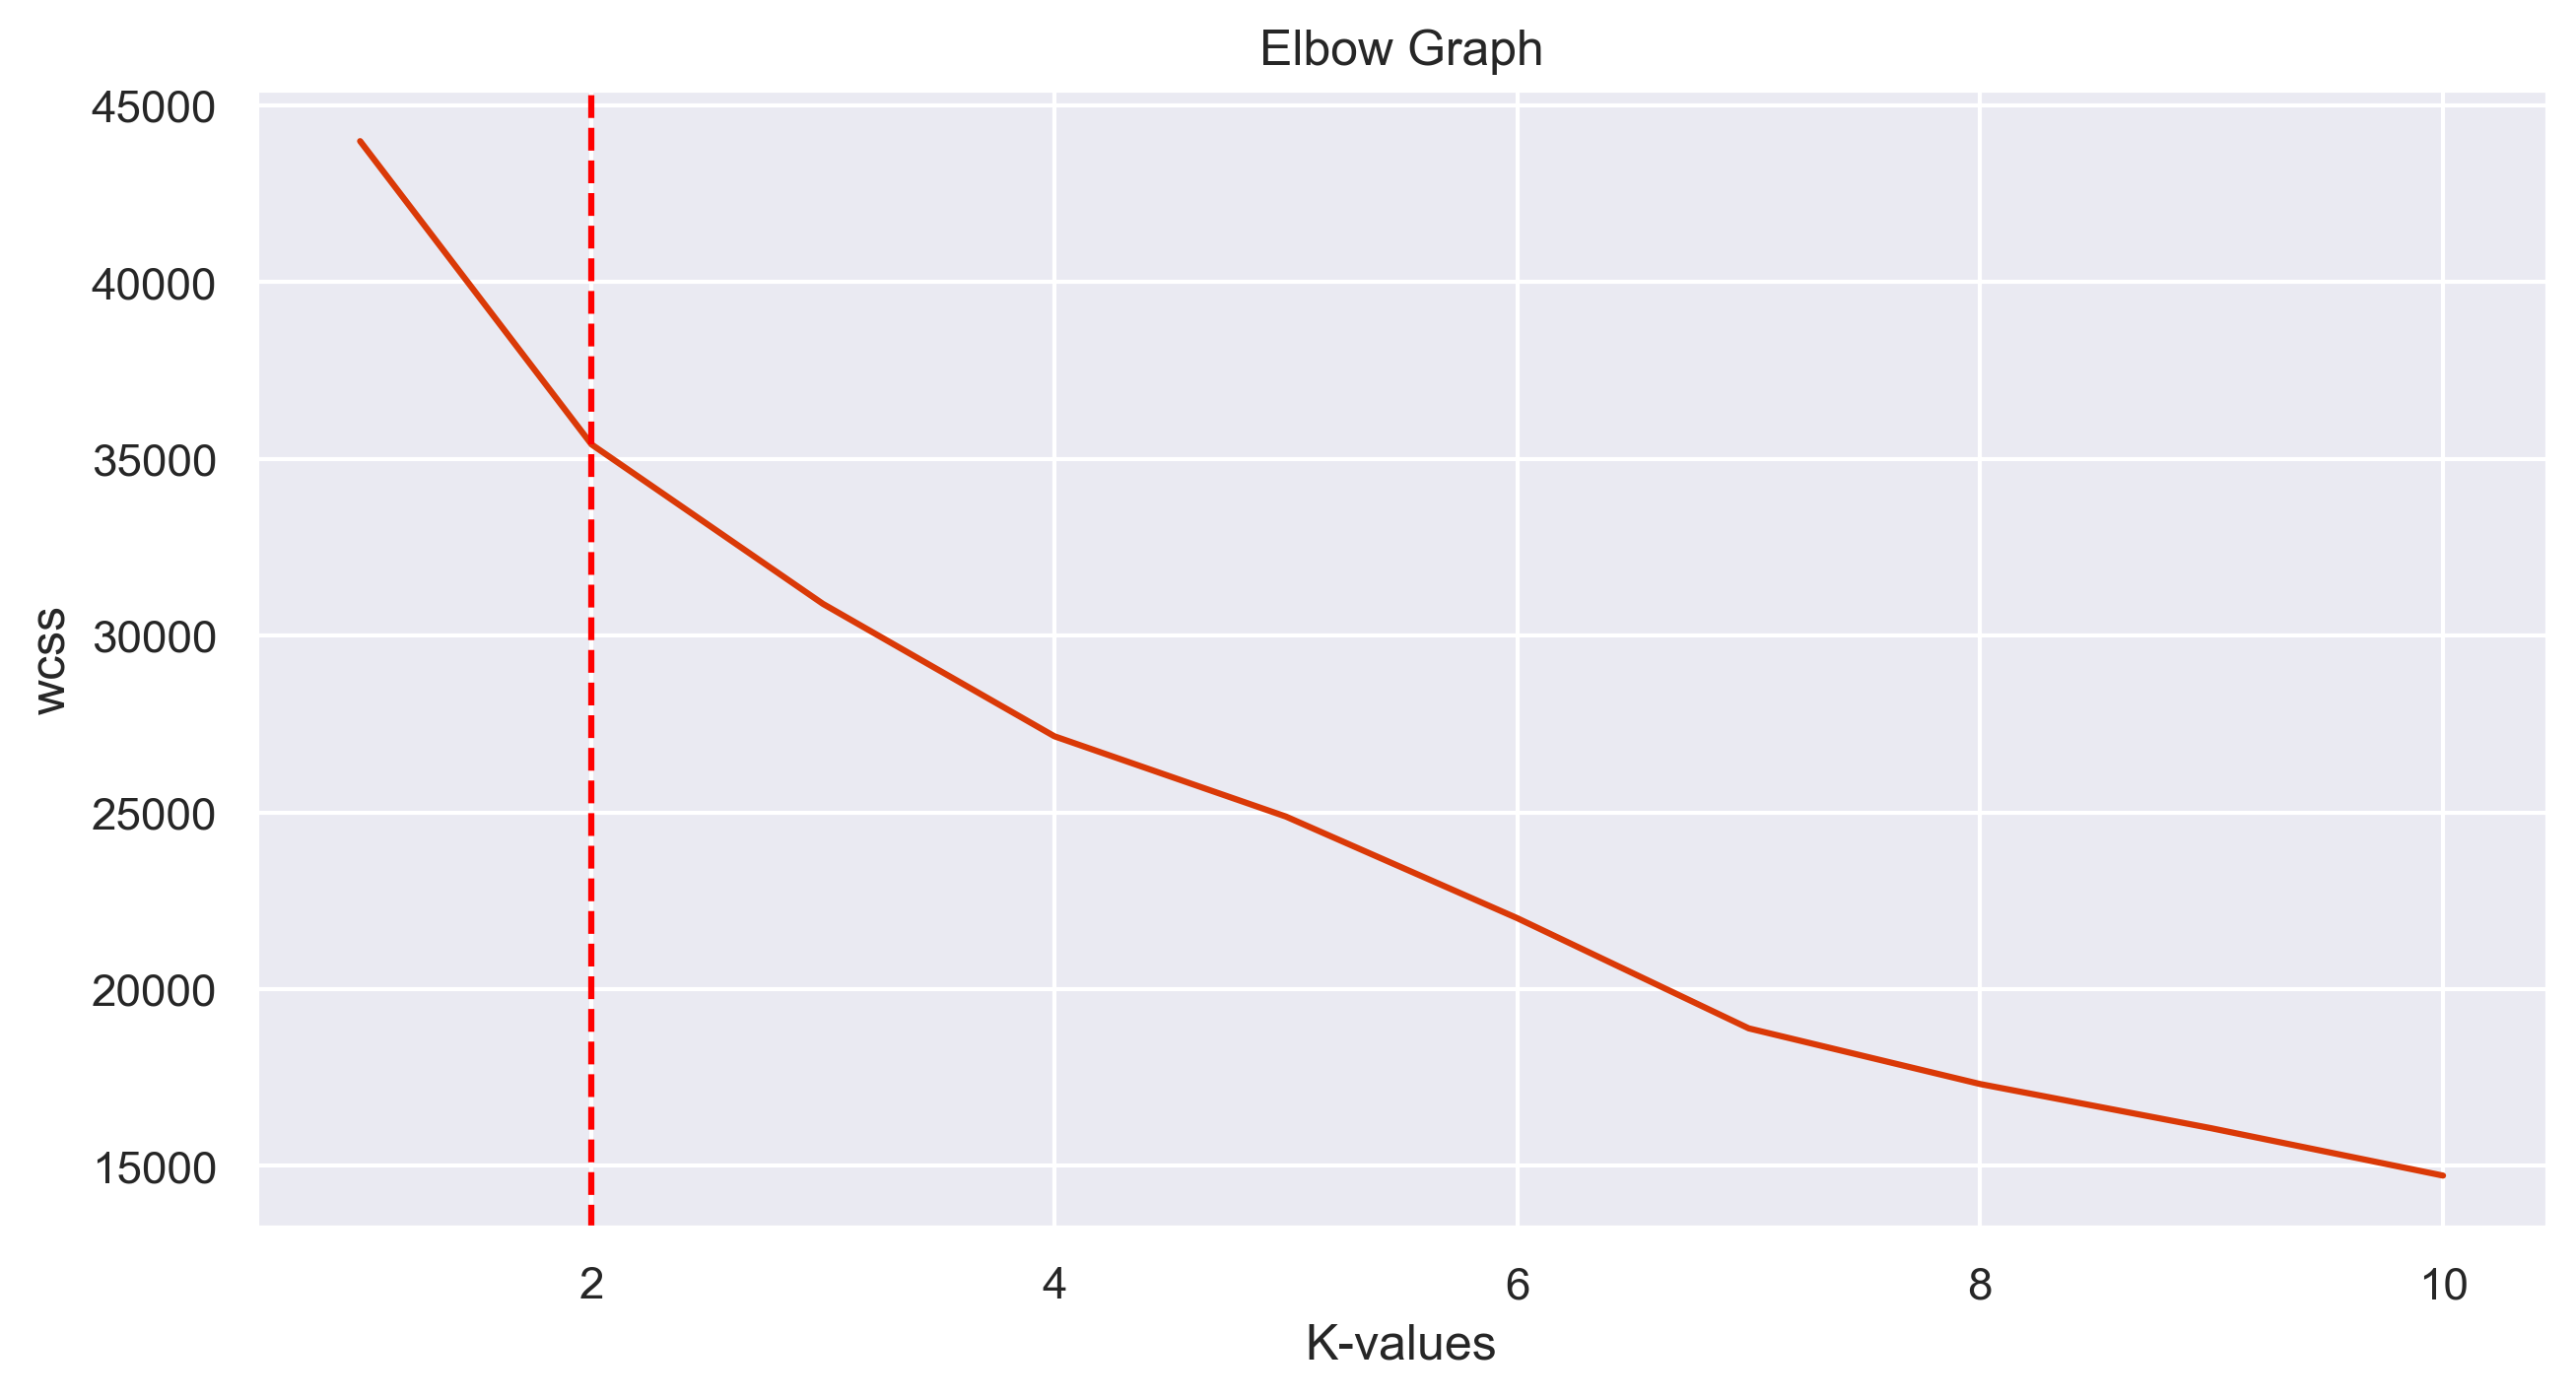

In [19]:
plt.plot(range(1,11),wcss)#elbow looks to be bending at 2 lets see the silhouette_score
plt.axvline(x=2,linestyle='--',color='red')
plt.xlabel('K-values')
plt.ylabel('wcss')
plt.title('Elbow Graph')

In [20]:
#Kmeans model
km=KMeans(n_clusters=2)
ypred_kmeans=km.fit_predict(x)
ypred_kmeans

array([1, 1, 1, ..., 1, 1, 1])

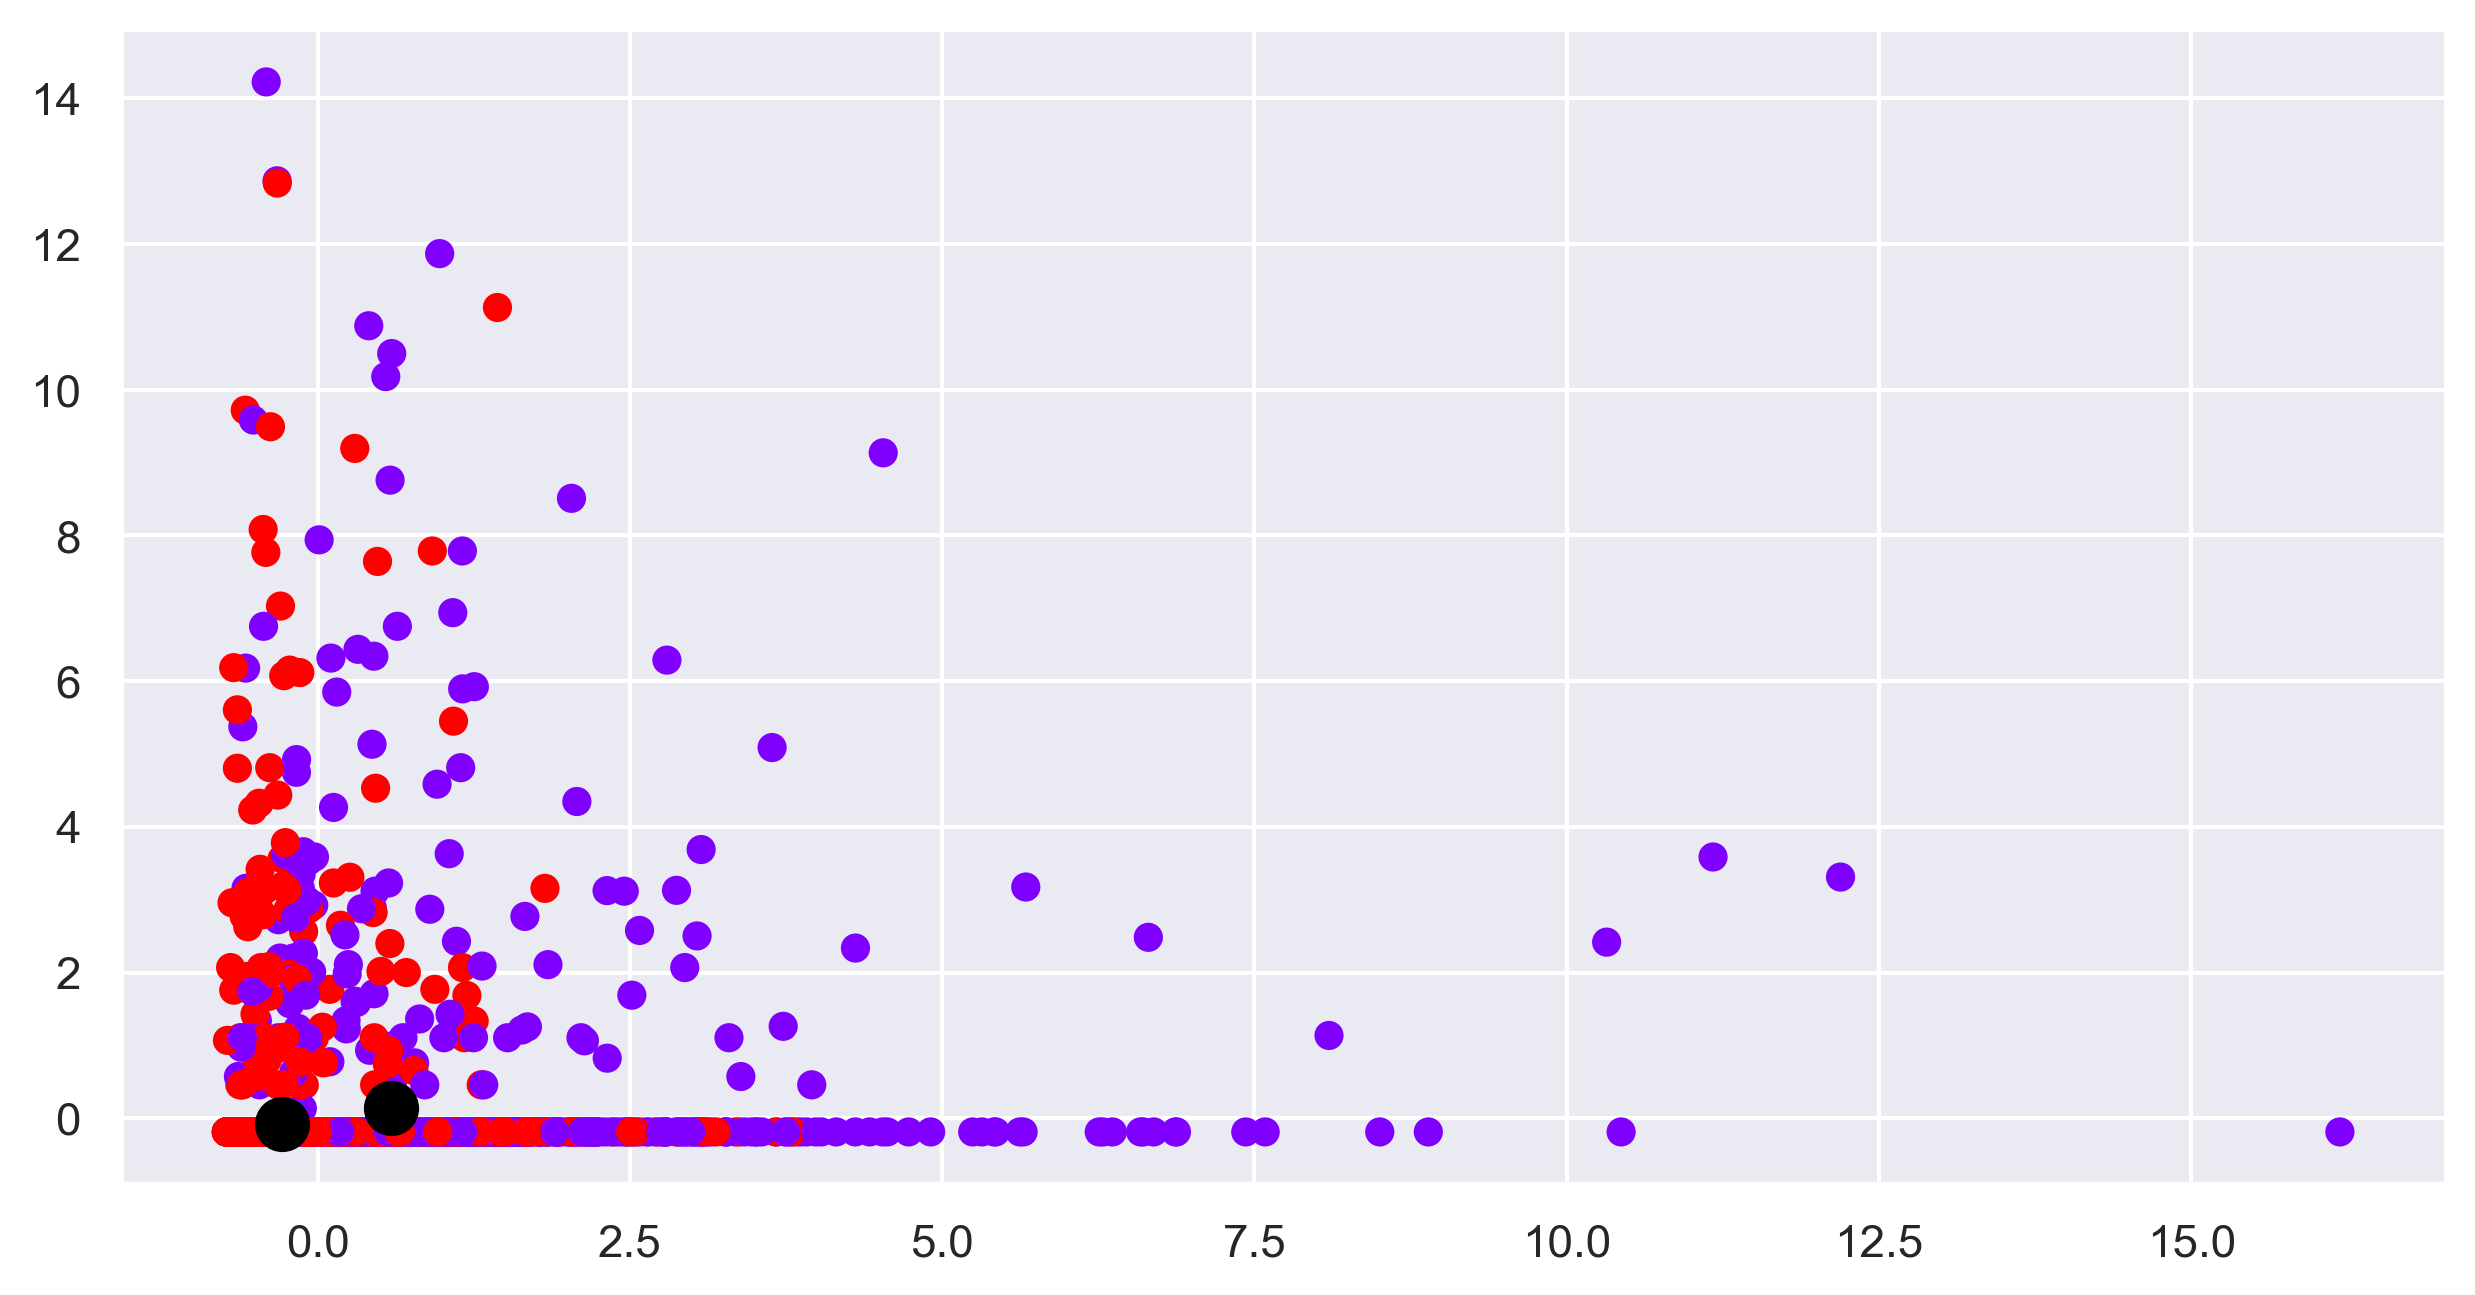

In [21]:
plt.scatter(x[:,0],x[:,1],c=ypred_kmeans,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s=150 )

In [22]:
#silhouette_score
sil(x,ypred_kmeans)

0.32542136327826215

In [23]:
df2 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)

df2['cluster_kmeans']=ypred_kmeans
df2.groupby('cluster_kmeans').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster_kmeans                                                               
0               132760.658986  257.798771   3.610599   1.009985   1.036866   
1                45041.650352   89.232481   1.310716   1.016685   1.000371   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster_kmeans                                                                  
0               41429.117512    20.380952         967.233487         2.902458   
1                5421.404894     7.363737         215.211346         0.635521   

                Days_since_enroll    Award?  
cluster_kmeans                               
0                     4942.417819  0.708909  
1                     3720.834631  0.206897

# DBSCAN Clustering

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
db=DBSCAN(eps=0.5,min_samples=3)

In [26]:
y_dbscan=db.fit_predict(x)
y_dbscan

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

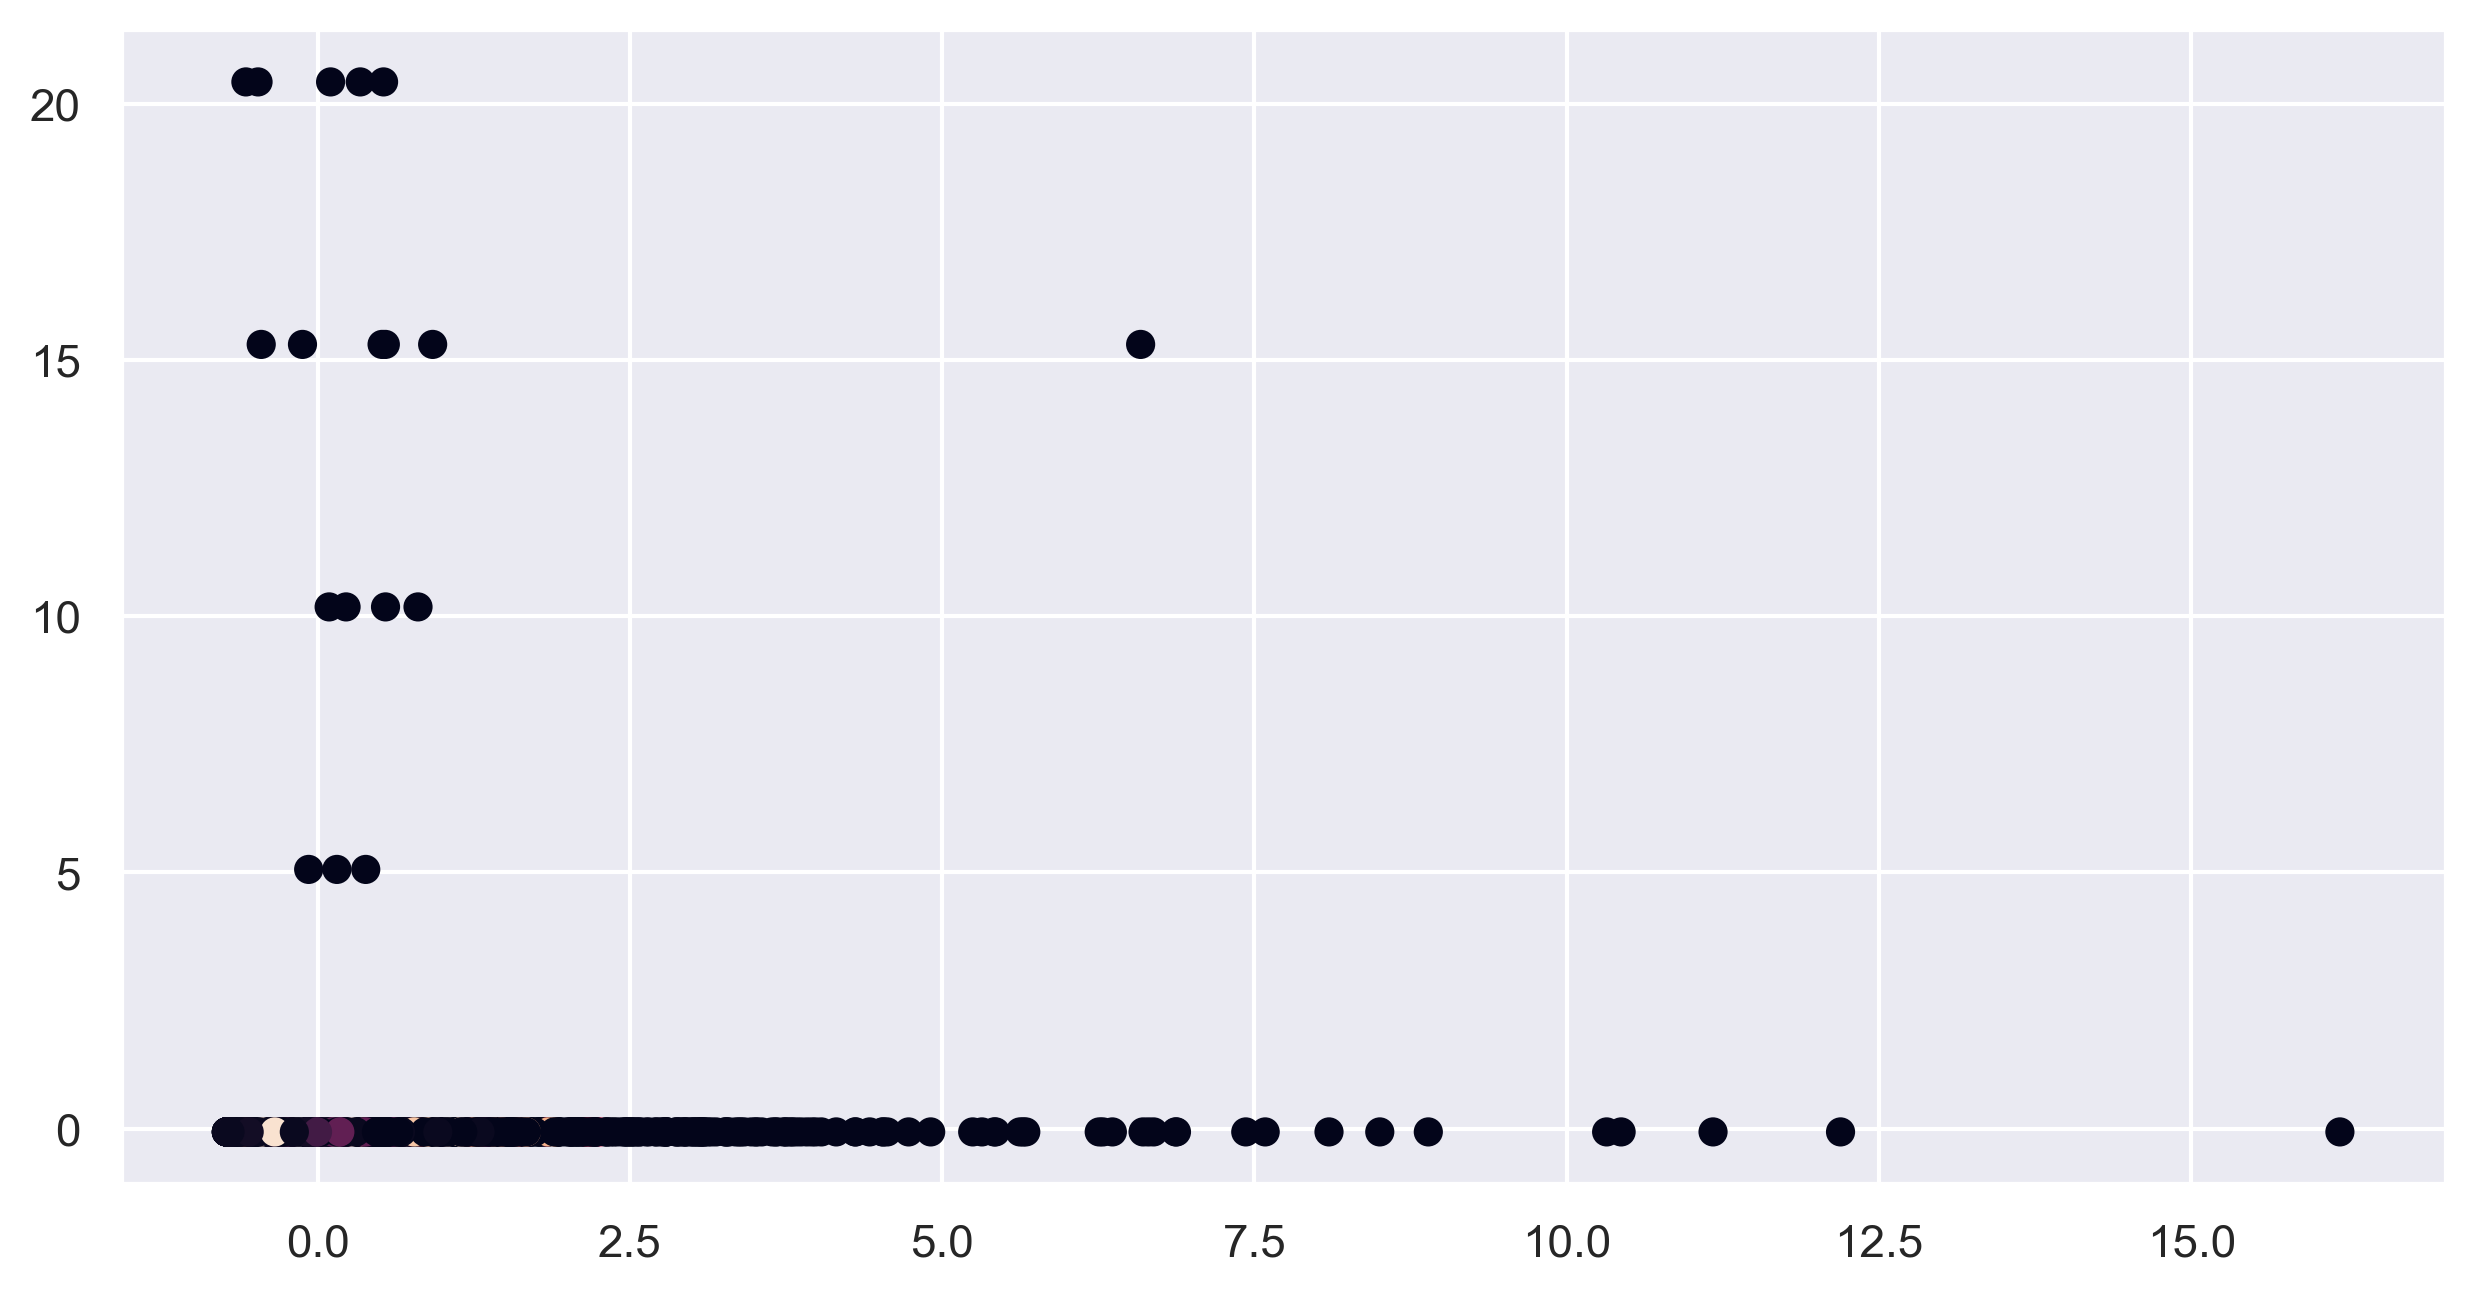

In [27]:
plt.scatter(x[:,0],x[:,4],c=y_dbscan)

In [28]:
sil(x,y_dbscan)#sil score is near to zero not good

-0.11448578186172835

# finding out the best eps value(k-dist plot)

Text(0.5, 1.0, 'K-Distance Graph')

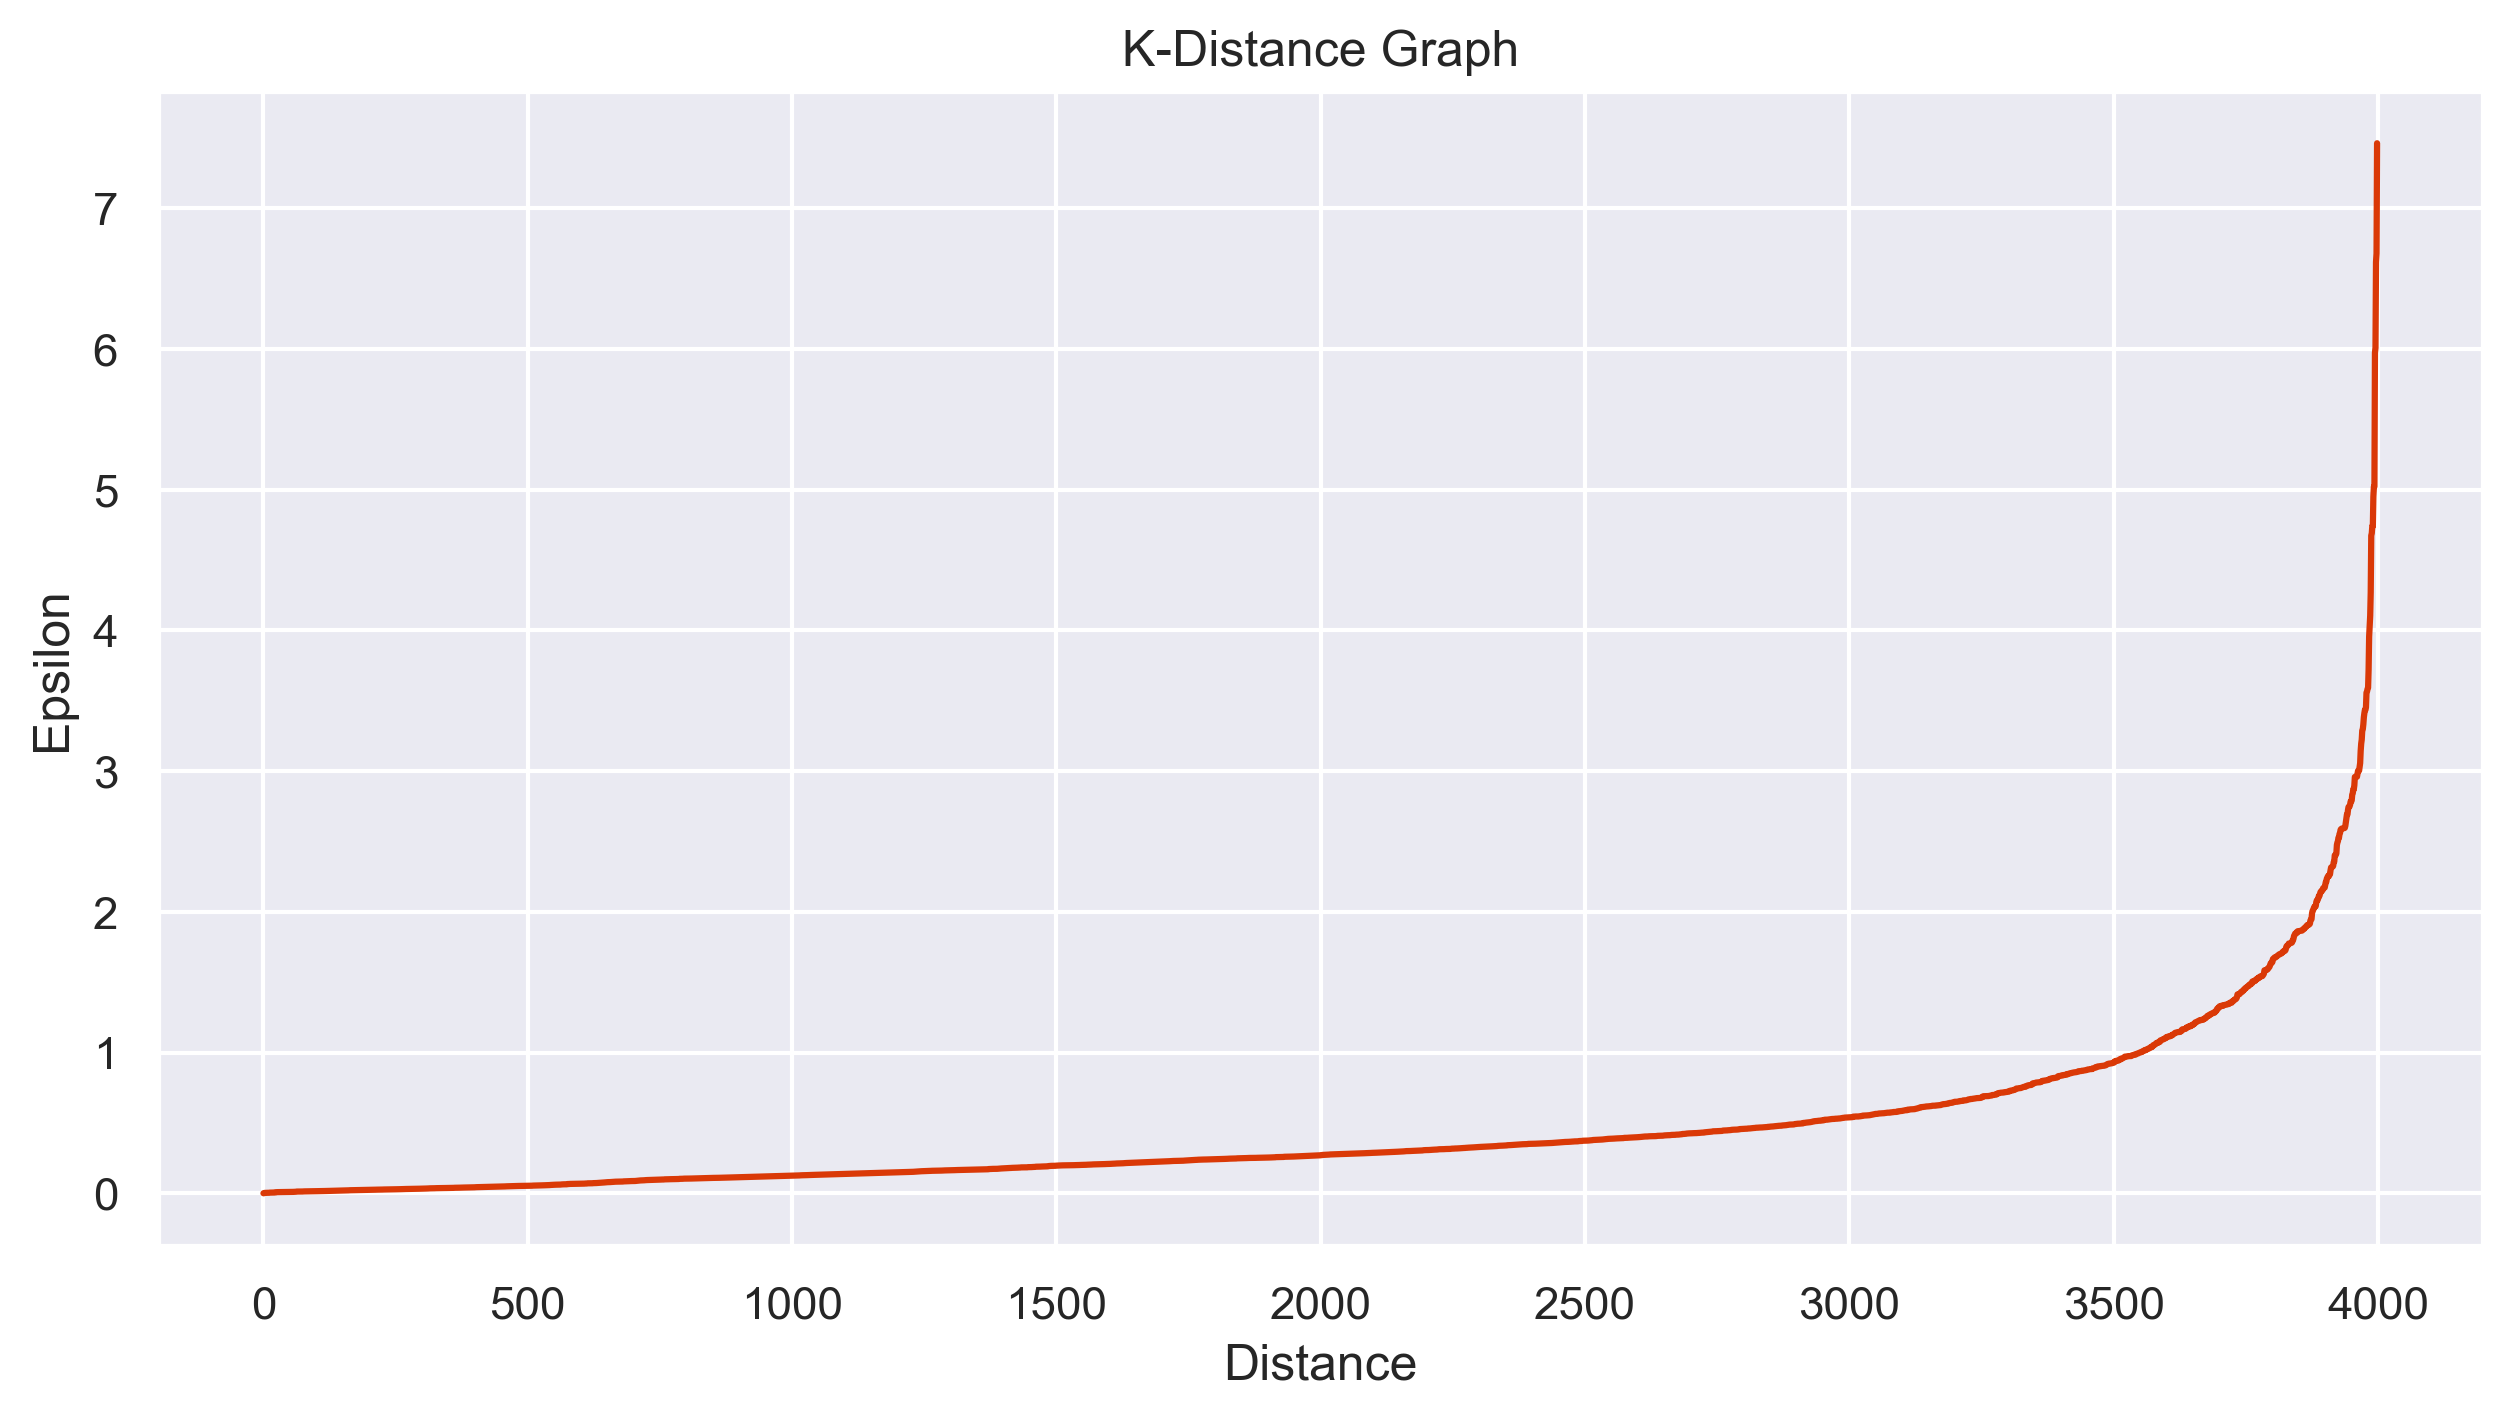

In [31]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=3).fit(x)
d,indexe = neigh.kneighbors(x)
distance=np.sort(d[:,1])
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.title('K-Distance Graph')

In [32]:
db1 = DBSCAN(eps=2,min_samples=3)
yp=db1.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

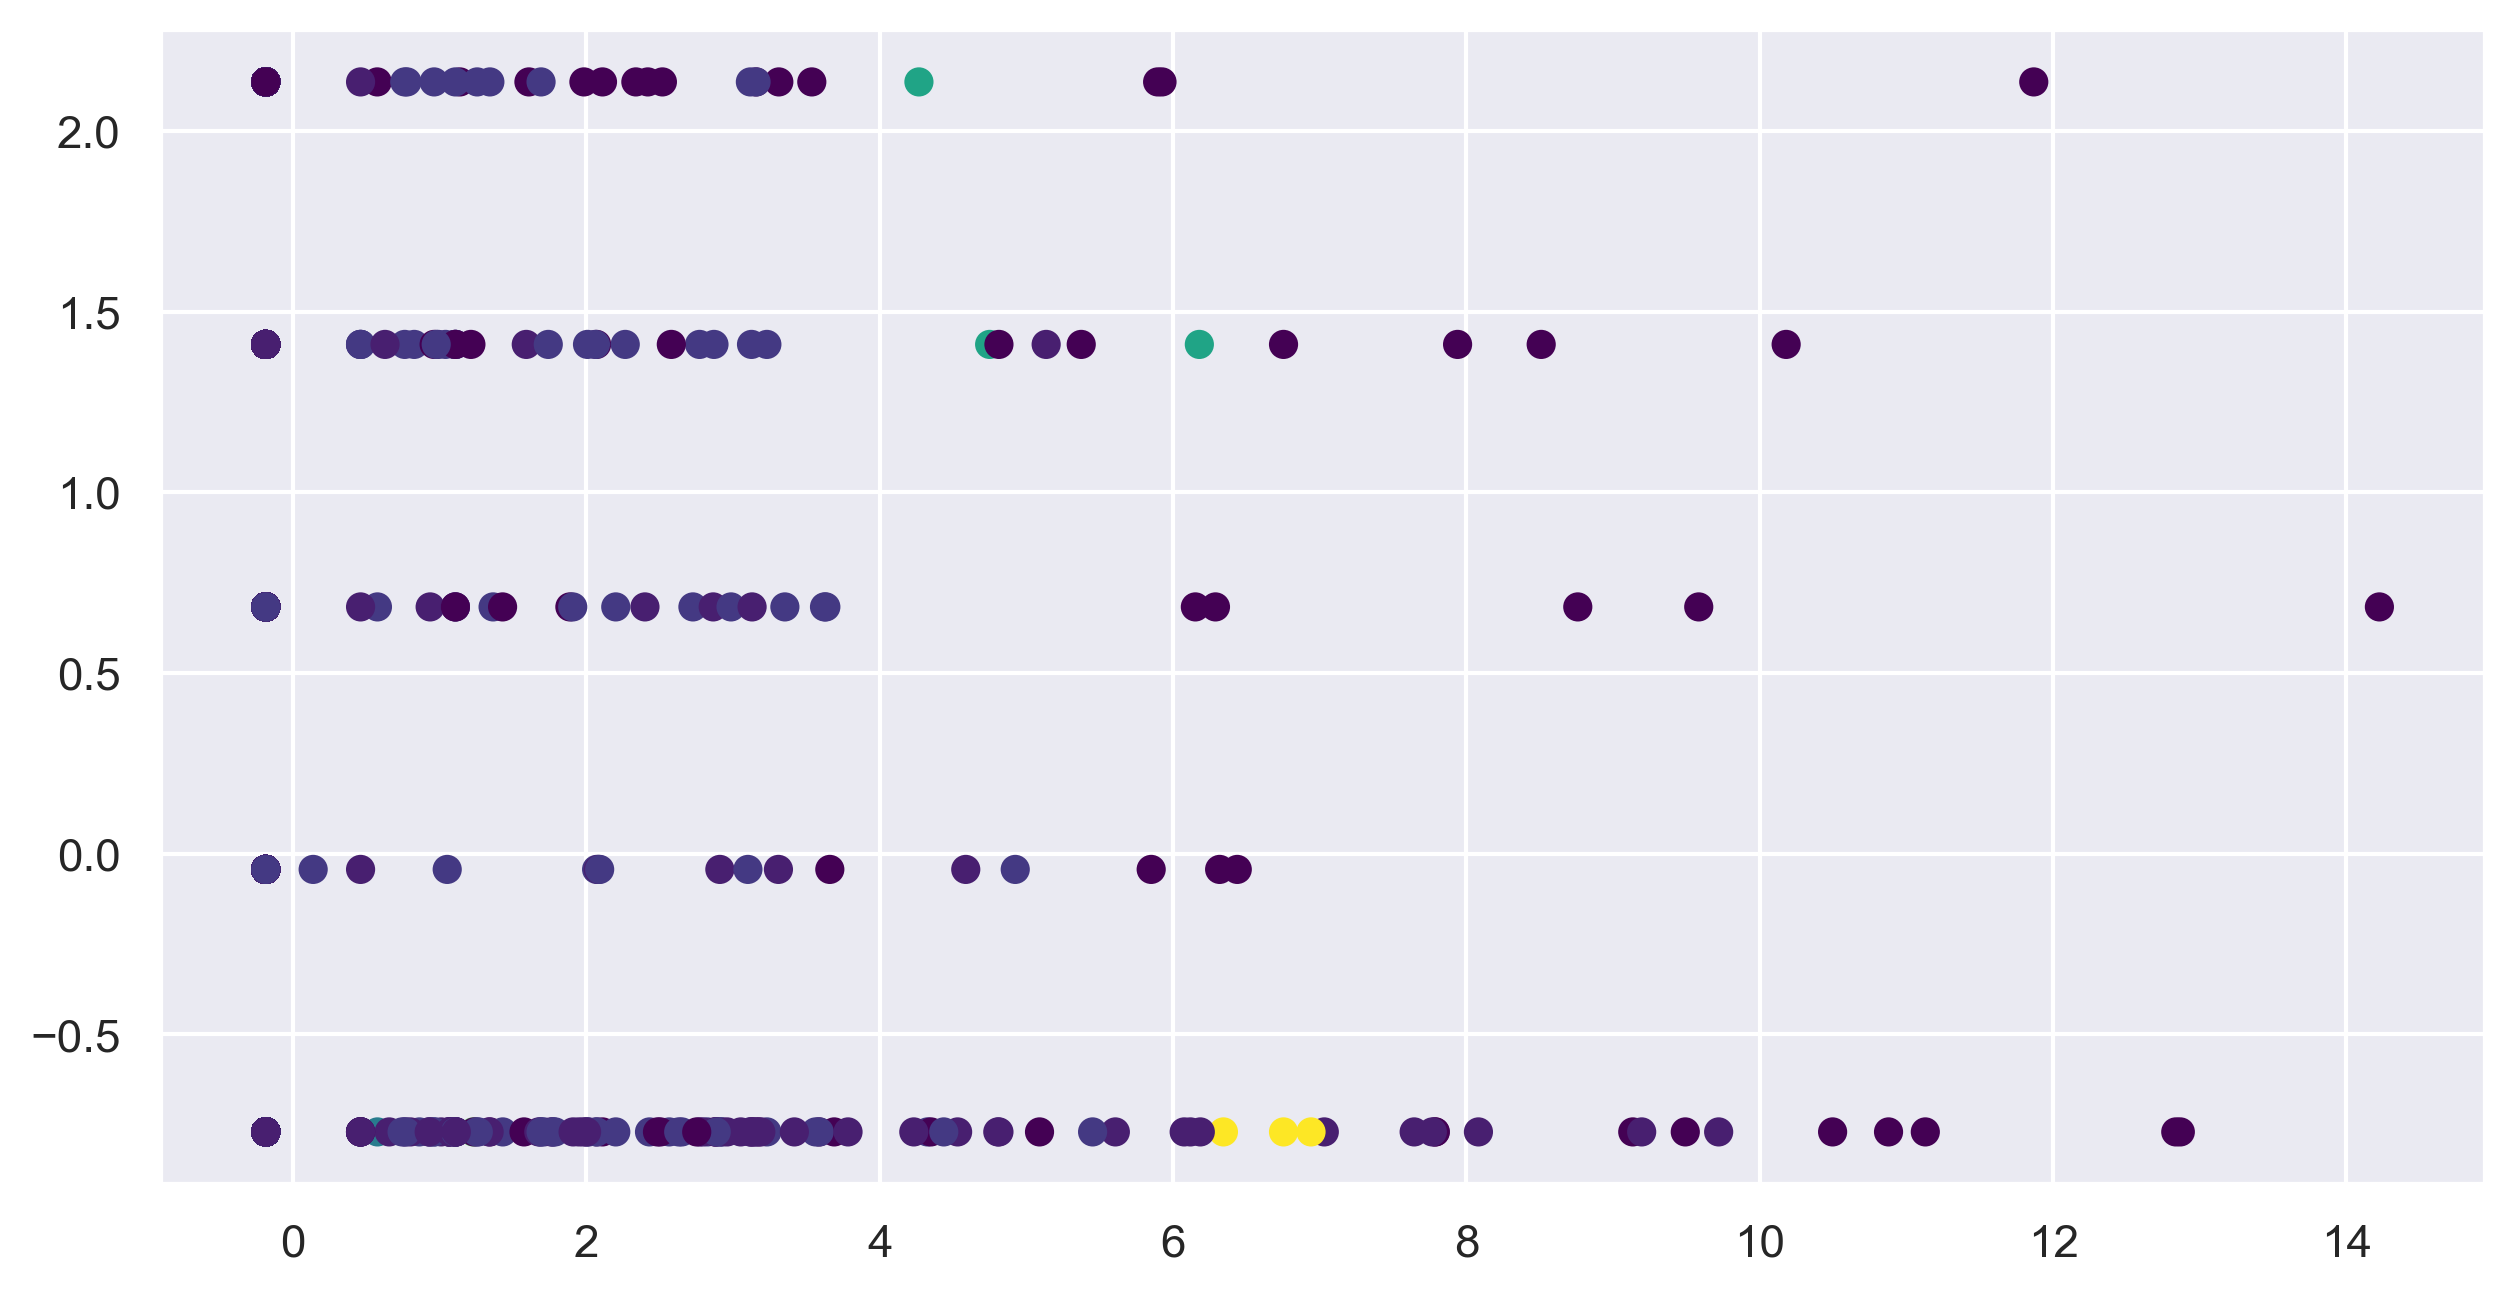

In [33]:
plt.scatter(x[:,1],x[:,2],c=yp,cmap='viridis')

In [34]:
sil(x,yp)#sil score is improved lets increases the eps value and check its sil score

0.2457363433586349

In [37]:
db2 = DBSCAN(eps=2.5,min_samples=3)#sil has greatly increased 
yp1=db2.fit_predict(x)
sil(x,yp1)

0.5261112993983253

# selecting min_samples:
1. No.of columns+1=11+1=12
2. No.of columns+2
3. No.of Dimensions+1
4. Always keep min_samples atleast 3

In [45]:
db3 = DBSCAN(eps=2.5,min_samples=12)#sil has greatly increased 
yp2=db3.fit_predict(x)
sil(x,yp2)

0.541087905291142

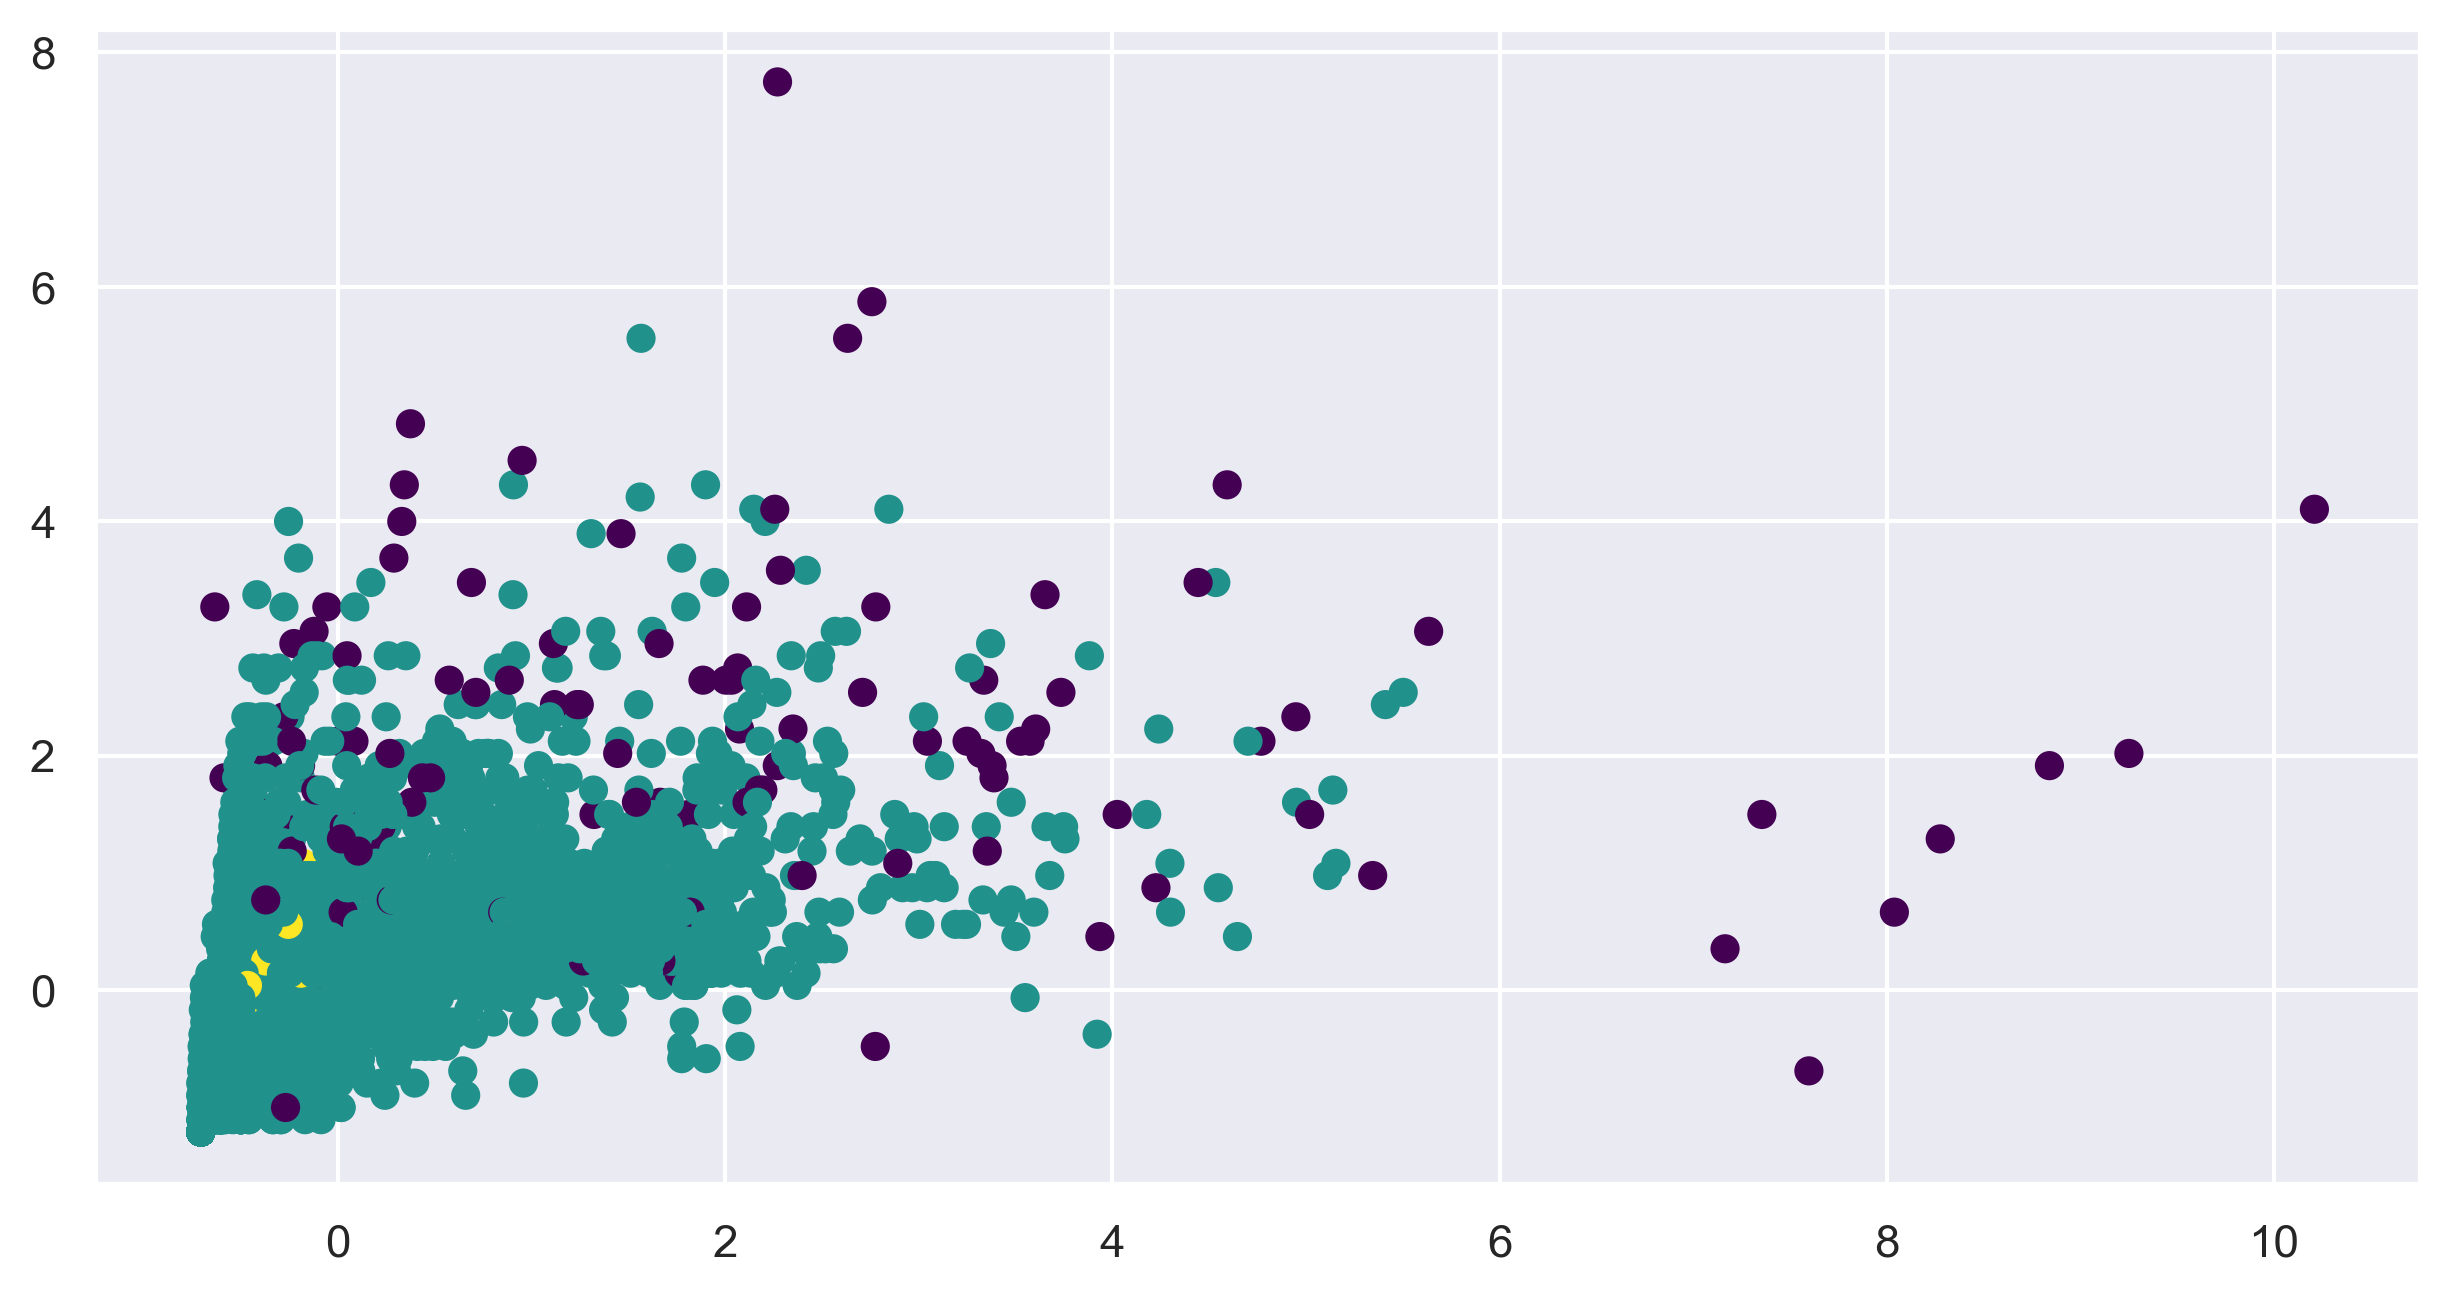

In [60]:
plt.scatter(x[:,5],x[:,6],c=yp2,cmap='viridis')

In [61]:
df3 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)
df3['Cluster_']=yp2

In [64]:
df3[df3['Cluster_']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
9      443003           0          3          2          1         1753   
66      53914           0          3          1          1        33767   
72      84409        5031          2          1          1        15436   
90     609477           0          3          1          1        21422   
109     96627        1182          1          1          3        49059   
...       ...         ...        ...        ...        ...          ...   
3869    97510        1678          5          1          1        71609   
3906   126167           0          5          1          1       190160   
3934    55922        2273          1          1          1         8104   
3940   130748           0          4          1          1        65510   
3957    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
9              43               3850               12               6948   
66             45               5550               29               6826   
72             16               1150                4               7766   
90             22               1200                8               6820   
109            26               2300                9               6738   
...           ...                ...              ...                ...   
3869           51               7650               26               1665   
3906           15                  0                0               1612   
3934           19               4104               16               1552   
3940           37               6349                7               1545   
3957            2               9577                1               1515   

      Award?  Cluster_  
ID#                     
9          1        -1  
66         1        -1  
72         0        -1  
90         0        -1  
109        1        -1  
...      ...       ...  
3869       1        -1  
3906       1        -1  
3934       0        -1  
3940       0        -1  
3957       0        -1  

[163 rows x 12 columns]

In [66]:
df3.groupby('Cluster_').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_                                                                
-1        248917.073620  1649.815951   2.638037   1.214724   1.300613   
 0         66311.671650    80.617362   2.041175   1.000000   1.000000   
 1         39644.434783     0.000000   1.000000   2.000000   1.000000   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_                                                                  
-1        50893.049080    26.190184        3853.570552        11.012270   
 0        15751.517440    10.965382         316.425649         0.965119   
 1         8962.478261    13.739130         221.739130         0.782609   

          Days_since_enroll    Award?  
Cluster_                               
-1              4811.325153  0.736196  
 0              4090.586939  0.355101  
 1              3846.304348  0.304348